In [1]:
# Import necessary libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from datetime import datetime
import dataframe_image as dfi

## Normal ride - One hour data

In [2]:
# Import the data. 

normal_ride_1h = pd.read_csv('1hr_normal_rider_cleaned.csv')

# Preview the data.

print(normal_ride_1h.info())
normal_ride_1h.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52011 entries, 0 to 52010
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      52011 non-null  int64  
 1   timestamp (ms)  52011 non-null  int64  
 2   acc_x           52011 non-null  int64  
 3   acc_y           52011 non-null  int64  
 4   acc_z           52011 non-null  int64  
 5   gyro_x          52011 non-null  float64
 6   gyro_y          52011 non-null  float64
 7   gyro_z          52011 non-null  float64
 8   Speed(Km/h)     52011 non-null  float64
dtypes: float64(4), int64(5)
memory usage: 3.6 MB
None


,Unnamed: 0,timestamp (ms),acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z,Speed(Km/h)
0,0,2019518,0,-64,-64,2.019,0.155,3.584,0.0
1,1,2019530,-64,64,96,2.019,0.155,3.584,0.0
2,2,2019542,256,32,-224,2.019,0.155,3.584,0.0
3,3,2019555,-64,0,320,2.019,0.155,3.584,0.0
4,4,2019567,64,128,0,2.019,0.155,3.584,0.0


In [3]:
# Calculate Amag and Gmag.

normal_ride_1h['Amag'] = np.sqrt( (normal_ride_1h['acc_x'])**2 + (normal_ride_1h['acc_y'])**2 + normal_ride_1h['acc_z']**2 )

normal_ride_1h['Gmag'] = np.sqrt( (normal_ride_1h['gyro_x'])**2 + (normal_ride_1h['gyro_y'])**2 + normal_ride_1h['gyro_z']**2 )

In [4]:
# Preview data.

normal_ride_1h.head()

,Unnamed: 0,timestamp (ms),acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z,Speed(Km/h),Amag,Gmag
0,0,2019518,0,-64,-64,2.019,0.155,3.584,0.0,90.509668,4.116484
1,1,2019530,-64,64,96,2.019,0.155,3.584,0.0,131.939380,4.116484
2,2,2019542,256,32,-224,2.019,0.155,3.584,0.0,341.666504,4.116484
3,3,2019555,-64,0,320,2.019,0.155,3.584,0.0,326.337249,4.116484
4,4,2019567,64,128,0,2.019,0.155,3.584,0.0,143.108351,4.116484


In [5]:
# Calculate normalised Amag and Gmag.

normal_ride_1h['Amag_norm'] = ((normal_ride_1h['Amag'] - normal_ride_1h['Amag'].min())/ 
                                     (normal_ride_1h['Amag'].max() - normal_ride_1h['Amag'].min()))

normal_ride_1h['Gmag_norm'] = ((normal_ride_1h['Gmag'] - normal_ride_1h['Gmag'].min())/ 
                                     (normal_ride_1h['Gmag'].max() - normal_ride_1h['Gmag'].min()))




In [6]:
# Preview data.

normal_ride_1h.head()

,Unnamed: 0,timestamp (ms),acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z,Speed(Km/h),Amag,Gmag,Amag_norm,Gmag_norm
0,0,2019518,0,-64,-64,2.019,0.155,3.584,0.0,90.509668,4.116484,0.002670,0.043976
1,1,2019530,-64,64,96,2.019,0.155,3.584,0.0,131.939380,4.116484,0.003892,0.043976
2,2,2019542,256,32,-224,2.019,0.155,3.584,0.0,341.666504,4.116484,0.010078,0.043976
3,3,2019555,-64,0,320,2.019,0.155,3.584,0.0,326.337249,4.116484,0.009626,0.043976
4,4,2019567,64,128,0,2.019,0.155,3.584,0.0,143.108351,4.116484,0.004221,0.043976


In [7]:
# Calculate normal ride threshold statistics - AMAG

print(normal_ride_1h['Amag_norm'].describe())



AmagN_Q1 = np.quantile(normal_ride_1h['Amag_norm'], 0.25)
AmagN_Q3 = np.quantile(normal_ride_1h['Amag_norm'], 0.75)
AmagN_IQR = AmagN_Q3 - AmagN_Q1

AmagN_HO = AmagN_Q3 + (1.5 * AmagN_IQR)
AmagN_LO = AmagN_Q1 - (1.5 * AmagN_IQR)



print('First quantile is: ', AmagN_Q1)
print('Third quantile is: ', AmagN_Q3)
print('IQR is: ', AmagN_IQR)
print('High outlier is: ', AmagN_HO)
print('Low outlier is: ', AmagN_LO)

count    52011.000000
mean         0.087960
std          0.107392
min          0.000000
25%          0.009672
50%          0.045475
75%          0.130572
max          1.000000
Name: Amag_norm, dtype: float64
First quantile is:  0.009672299150750033
Third quantile is:  0.13057177373873846
IQR is:  0.12089947458798843
High outlier is:  0.3119209856207211
Low outlier is:  -0.1716769127312326


In [8]:
# Create function to calculate the different thresholds level and return "classification data".
# store Q3, mean and sd in variables and apply to functions for ease of reuse if we get more normal data

Amag_sd = normal_ride_1h['Amag_norm'].std()
Amag_mean = normal_ride_1h['Amag_norm'].mean()


def Amag_Q3_threshold(value):
    
    if value > AmagN_Q3:
        return 'Abnormal data'
    
    else:
        return 'Normal data'




In [9]:
# Create standard deviation threshold functions.

# If value is greater than the mean +/- the standard deviation (of the normal ride data)

def Amag_std_threshold(value):
    
    if value > Amag_mean + Amag_sd:
        return 'Abnormal data'
    
    elif value < Amag_mean - Amag_sd:
        return 'Abnormal data'
    else: 
        return 'Normal data'




In [10]:
# Create high outlier threhsold function.

def Amag_HO_threshold(value):
    
    if value > AmagN_HO:
        return 'Abnormal data'
    else:
        return 'Normal data'

In [11]:
# apply thresholds to data
normal_ride_1h['Amag_std_threshold'] = normal_ride_1h['Amag_norm'].apply(Amag_std_threshold)
normal_ride_1h['Amag_Q3_threshold'] = normal_ride_1h['Amag_norm'].apply(Amag_Q3_threshold)
normal_ride_1h['Amag_HO_threshold'] = normal_ride_1h['Amag_norm'].apply(Amag_HO_threshold)

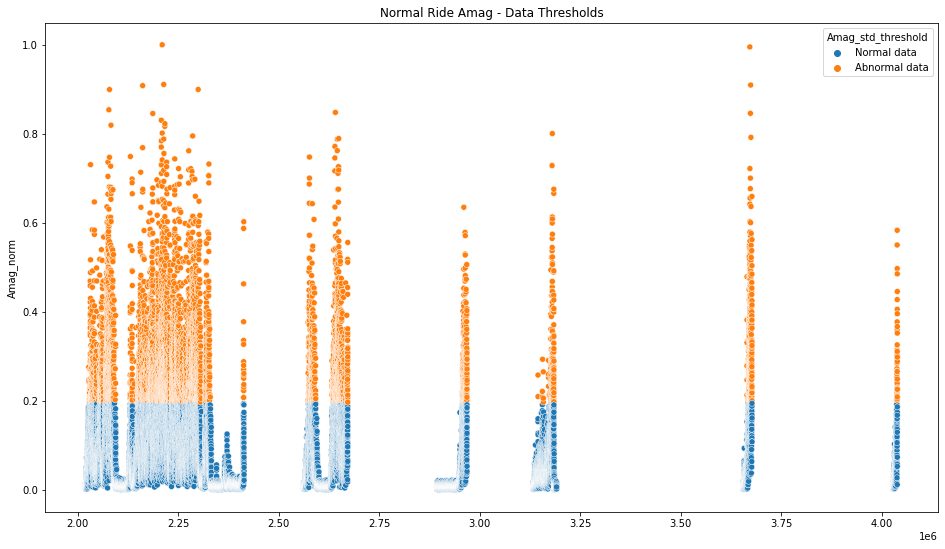

In [12]:
# visualise the threshold - std

fig, axes = plt.subplots(figsize=(16,9))

sns.scatterplot(data=normal_ride_1h, x = "timestamp (ms)", y = 'Amag_norm', hue = 'Amag_std_threshold').set(title = 'Normal Ride Amag - Data Thresholds')
axes.set_xlabel('')

fig.savefig("Normal Ride Amag std.png")

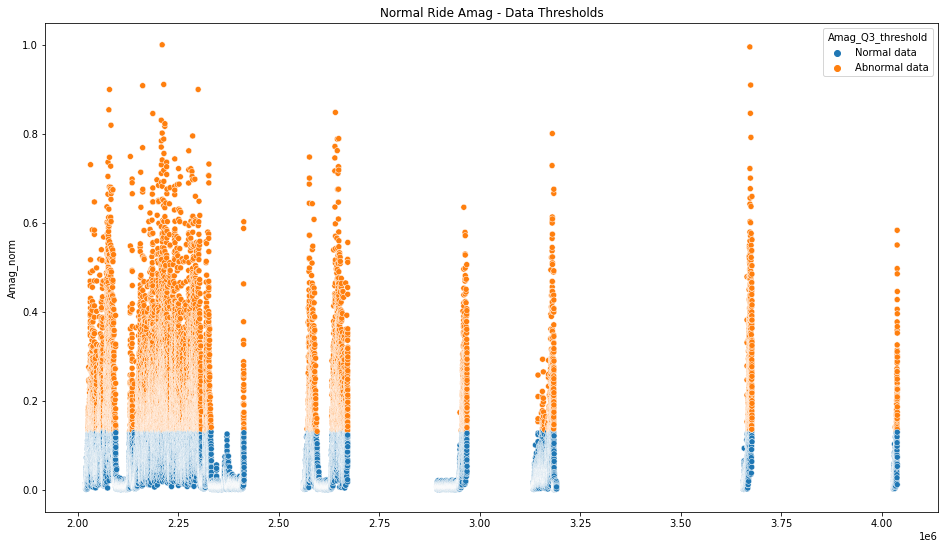

In [13]:
# visualise the threshold - Q3

fig, axes = plt.subplots(figsize=(16,9))

sns.scatterplot(data=normal_ride_1h, x = "timestamp (ms)", y = 'Amag_norm', hue = 'Amag_Q3_threshold').set(title = 'Normal Ride Amag - Data Thresholds')
axes.set_xlabel('')

fig.savefig("Normal Ride Amag q3.png")

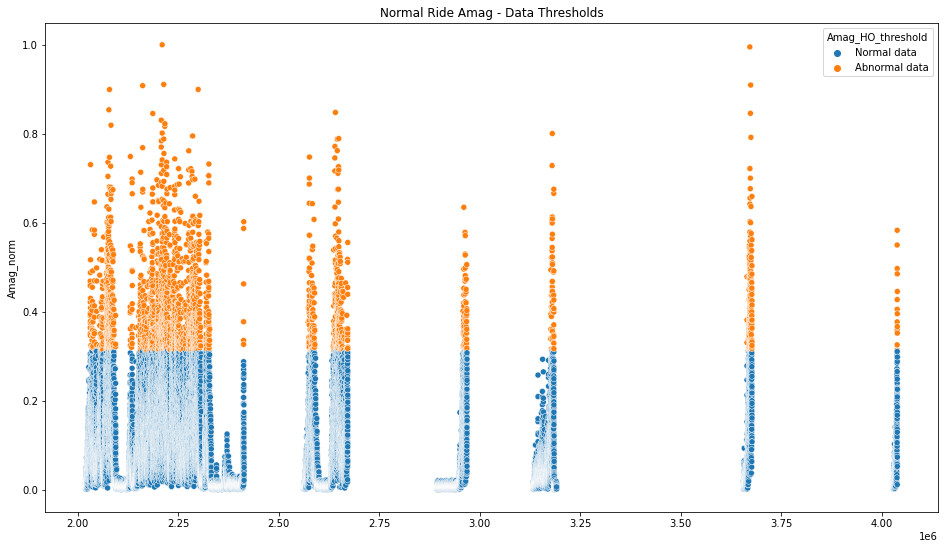

In [14]:
# visualise the threshold - H0

fig, axes = plt.subplots(figsize=(16,9))

sns.scatterplot(data=normal_ride_1h, x = "timestamp (ms)", y = 'Amag_norm', hue = 'Amag_HO_threshold').set(title = 'Normal Ride Amag - Data Thresholds')
axes.set_xlabel('')

fig.savefig("Normal Ride Amag h0.png")

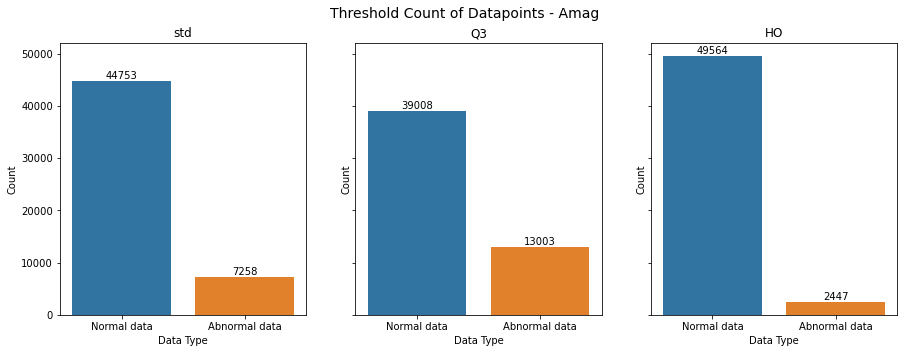

In [15]:
# visualise the count of data in each label

# count data
data_count_amag_std = normal_ride_1h.groupby('Amag_std_threshold').count()
data_count_amag_std.sort_values(by = ['Amag_norm'], ascending = False, inplace = True)
data_count_amag_Q3 = normal_ride_1h.groupby('Amag_Q3_threshold').count()
data_count_amag_Q3.sort_values(by = ['Amag_norm'], ascending = False, inplace = True)
data_count_amag_HO = normal_ride_1h.groupby('Amag_HO_threshold').count()
data_count_amag_HO.sort_values(by = ['Amag_norm'], ascending = False, inplace = True)

# plot 
fig, (ax1, ax2, ax3) = plt.subplots(ncols= 3, sharey = True, figsize = (15,5))

fig.suptitle("Threshold Count of Datapoints - Amag", fontsize=14)

sns.barplot(data=data_count_amag_std, x = data_count_amag_std.index, y = 'Amag_norm', ax = ax1)
ax1.plot
ax1.set_title('std')
ax1.set_xlabel('Data Type')
ax1.set_ylabel('Count')
ax1.bar_label(ax1.containers[0])

sns.barplot(data=data_count_amag_Q3, x = data_count_amag_Q3.index, y = 'Amag_norm', ax = ax2)
ax2.plot
ax2.set_title('Q3')
ax2.set_xlabel('Data Type')
ax2.set_ylabel('Count')
ax2.bar_label(ax2.containers[0])


ax3 = sns.barplot(data=data_count_amag_HO, x = data_count_amag_HO.index, y = 'Amag_norm', ax = ax3)
ax3.plot
ax3.set_title('HO')
ax3.set_xlabel('Data Type')
ax3.set_ylabel('Count')
ax3.bar_label(ax3.containers[0])
fig.savefig("Accel 8 Normalamagct.png")

In [16]:
data_count_amag_Q3

,Unnamed: 0,timestamp (ms),acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z,Speed(Km/h),Amag,Gmag,Amag_norm,Gmag_norm,Amag_std_threshold,Amag_HO_threshold
Amag_Q3_threshold,,,,,,,,,,,,,,,
Normal data,39008,39008,39008,39008,39008,39008,39008,39008,39008,39008,39008,39008,39008,39008,39008
Abnormal data,13003,13003,13003,13003,13003,13003,13003,13003,13003,13003,13003,13003,13003,13003,13003


In [17]:
# Calculate normal ride threshold statistics - GMAG

print(normal_ride_1h['Gmag_norm'].describe())



GmagN_Q1 = np.quantile(normal_ride_1h['Gmag_norm'], 0.25)
GmagN_Q3 = np.quantile(normal_ride_1h['Gmag_norm'], 0.75)
GmagN_IQR = GmagN_Q3 - GmagN_Q1

GmagN_HO = GmagN_Q3 + (1.5 * GmagN_IQR)
GmagN_LO = GmagN_Q1 - (1.5 * GmagN_IQR)



print('First quantile is: ', GmagN_Q1)
print('Third quantile is: ', GmagN_Q3)
print('IQR is: ', GmagN_IQR)
print('High outlier is: ', GmagN_HO)
print('Low outlier is: ', GmagN_LO)

count    52011.000000
mean         0.144124
std          0.170546
min          0.000000
25%          0.024124
50%          0.095710
75%          0.199906
max          1.000000
Name: Gmag_norm, dtype: float64
First quantile is:  0.024124030642488185
Third quantile is:  0.19990564337345354
IQR is:  0.17578161273096535
High outlier is:  0.4635780624699015
Low outlier is:  -0.23954838845395982


In [18]:
# Create function to calculate the different thresholds level and return "classification data".
# store Q3, mean and sd in variables and apply to functions for ease of reuse if we get more normal data

Gmag_sd = normal_ride_1h['Gmag_norm'].std()
Gmag_mean = normal_ride_1h['Gmag_norm'].mean()


def Gmag_Q3_threshold(value):
    
    if value > GmagN_Q3:
        return 'Abnormal data'
    
    else:
        return 'Normal data'


In [19]:
# Create standard deviation threshold functions.

# If value is greater than the mean +/- the standard deviation (of the normal ride data)

def Gmag_std_threshold(value):
    
    if value > Gmag_mean + Gmag_sd:
        return 'Abnormal data'
    
    elif value < Gmag_mean - Gmag_sd:
        return 'Abnormal data'
    else: 
        return 'Normal data'


In [20]:
# Create high outlier threhsold function.

def Gmag_HO_threshold(value):
    
    if value > GmagN_HO:
        return 'Abnormal data'
    else:
        return 'Normal data'

In [21]:
# apply thresholds to data
normal_ride_1h['Gmag_std_threshold'] = normal_ride_1h['Gmag_norm'].apply(Gmag_std_threshold)
normal_ride_1h['Gmag_Q3_threshold'] = normal_ride_1h['Gmag_norm'].apply(Gmag_Q3_threshold)
normal_ride_1h['Gmag_HO_threshold'] = normal_ride_1h['Gmag_norm'].apply(Gmag_HO_threshold)

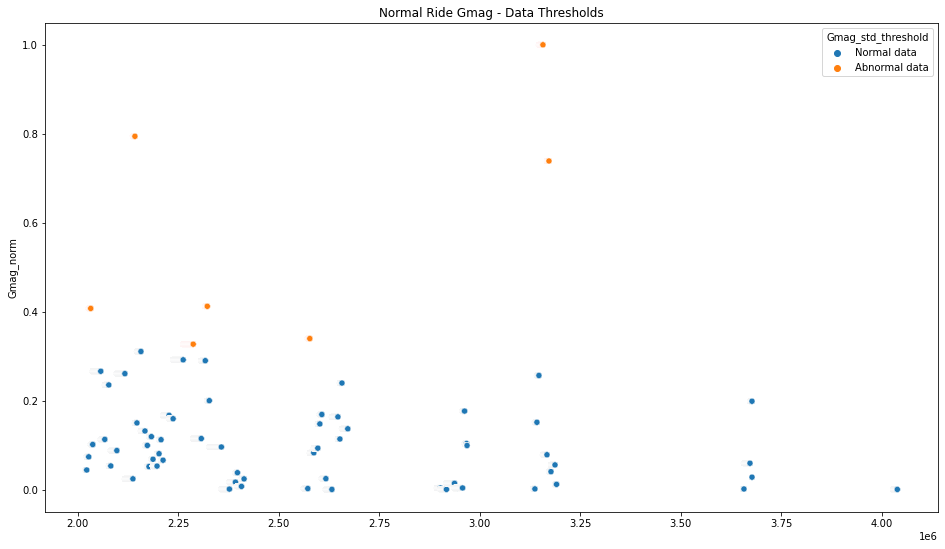

In [22]:
# visualise the threshold - std

fig, axes = plt.subplots(figsize=(16,9))

sns.scatterplot(data=normal_ride_1h, x = "timestamp (ms)", y = 'Gmag_norm', hue = 'Gmag_std_threshold').set(title = 'Normal Ride Gmag - Data Thresholds')
axes.set_xlabel('')

fig.savefig("Normal Ride Gmag std.png")

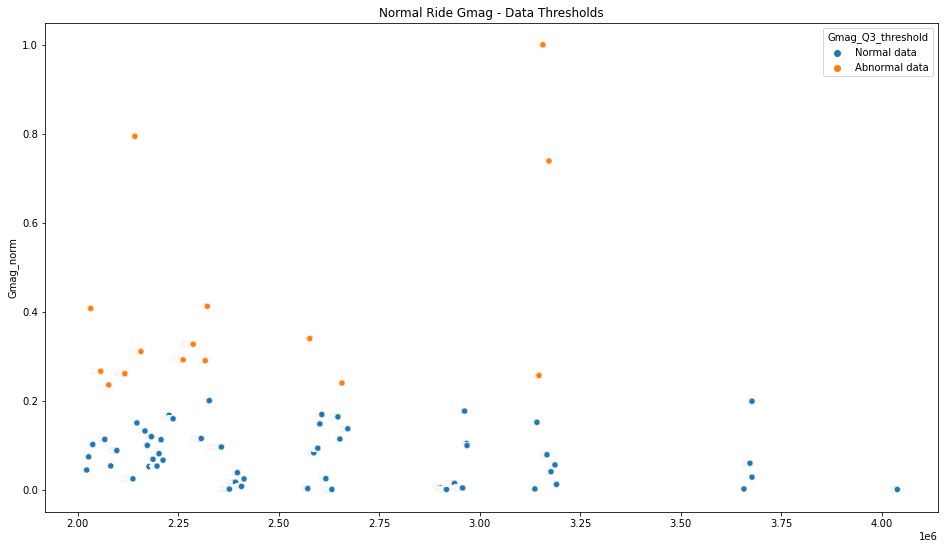

In [23]:
# visualise the threshold - Q3

fig, axes = plt.subplots(figsize=(16,9))

sns.scatterplot(data=normal_ride_1h, x = "timestamp (ms)", y = 'Gmag_norm', hue = 'Gmag_Q3_threshold').set(title = 'Normal Ride Gmag - Data Thresholds')
axes.set_xlabel('')

fig.savefig("Normal Ride Gmag q3.png")

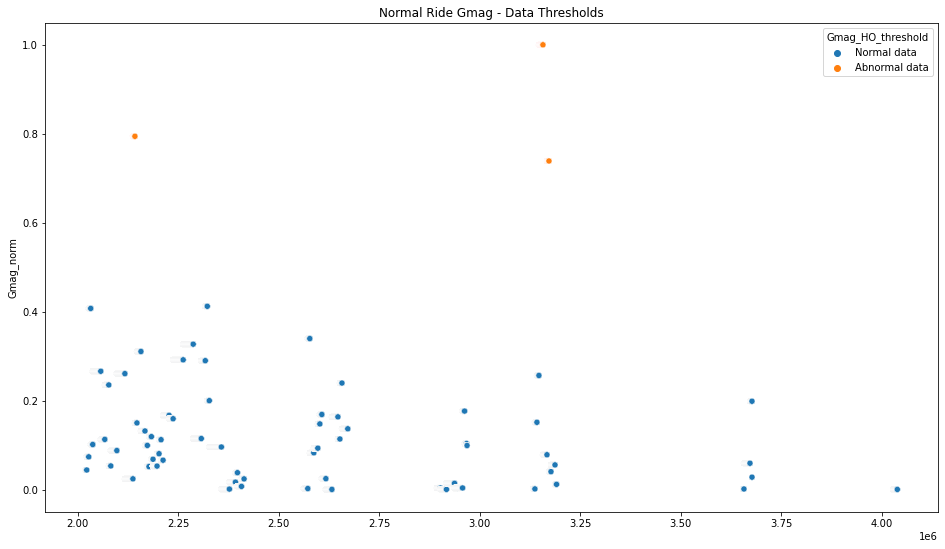

In [24]:
# visualise the threshold - H0

fig, axes = plt.subplots(figsize=(16,9))

sns.scatterplot(data=normal_ride_1h, x = "timestamp (ms)", y = 'Gmag_norm', hue = 'Gmag_HO_threshold').set(title = 'Normal Ride Gmag - Data Thresholds')
axes.set_xlabel('')

fig.savefig("Normal Ride Gmag h0.png")

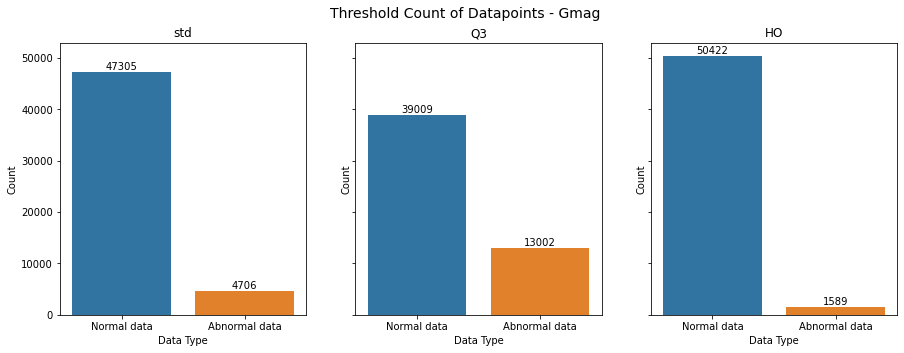

In [25]:
# visualise the count of data in each label

# count data
data_count_Gmag_std = normal_ride_1h.groupby('Gmag_std_threshold').count()
data_count_Gmag_std.sort_values(by = ['Gmag_norm'], ascending = False, inplace = True)
data_count_Gmag_Q3 = normal_ride_1h.groupby('Gmag_Q3_threshold').count()
data_count_Gmag_Q3.sort_values(by = ['Gmag_norm'], ascending = False, inplace = True)
data_count_Gmag_HO = normal_ride_1h.groupby('Gmag_HO_threshold').count()
data_count_Gmag_HO.sort_values(by = ['Gmag_norm'], ascending = False, inplace = True)

# plot 
fig, (ax1, ax2, ax3) = plt.subplots(ncols= 3, sharey = True, figsize = (15,5))

fig.suptitle("Threshold Count of Datapoints - Gmag", fontsize=14)

sns.barplot(data=data_count_Gmag_std, x = data_count_Gmag_std.index, y = 'Gmag_norm', ax = ax1)
ax1.plot
ax1.set_title('std')
ax1.set_xlabel('Data Type')
ax1.set_ylabel('Count')
ax1.bar_label(ax1.containers[0])

sns.barplot(data=data_count_Gmag_Q3, x = data_count_Gmag_Q3.index, y = 'Gmag_norm', ax = ax2)
ax2.plot
ax2.set_title('Q3')
ax2.set_xlabel('Data Type')
ax2.set_ylabel('Count')
ax2.bar_label(ax2.containers[0])


ax3 = sns.barplot(data=data_count_Gmag_HO, x = data_count_Gmag_HO.index, y = 'Gmag_norm', ax = ax3)
ax3.plot
ax3.set_title('HO')
ax3.set_xlabel('Data Type')
ax3.set_ylabel('Count')
ax3.bar_label(ax3.containers[0])
fig.savefig("Accel 8 NormalGmagct.png")

# Acceleration 1 

In [26]:
# Import the data.

Accel_1 = pd.read_csv('Accel_1_26_05_cleaned.csv')

# Preview the data.

print(Accel_1.info())
print(Accel_1.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  212 non-null    int64  
 1   Time        212 non-null    int64  
 2   X           212 non-null    int64  
 3   Y           212 non-null    int64  
 4   Z           212 non-null    int64  
 5   X_f         212 non-null    float64
 6   Y_f         212 non-null    float64
 7   Z_f         212 non-null    float64
dtypes: float64(3), int64(5)
memory usage: 13.4 KB
None
   Unnamed: 0     Time   X    Y   Z       X_f       Y_f       Z_f
0           0  2918276   0  -32   0  1.068721 -0.504631 -0.231132
1           1  2918374   0   64  64  1.067315 -0.442127 -0.089711
2           2  2918471  64  -32  32  1.150048 -0.472716 -0.019123
3           3  2918569 -32  160 -96  1.106470 -0.317224 -0.229926
4           4  2918666 -32  -32   0  1.062978 -0.347992 -0.229421


In [27]:
# Calculate filtered and unfiltered Amag for acceleration 1 data. 

Accel_1['fAmag'] = np.sqrt((Accel_1['X_f'])**2 + (Accel_1['Y_f'])**2 + (Accel_1['Z_f'])**2)

Accel_1['Amag'] = np.sqrt((Accel_1['X'])**2 + (Accel_1['Y'])**2 + (Accel_1['Z'])**2)




In [28]:
# Preview the data. 

Accel_1.head()

,Unnamed: 0,Time,X,Y,Z,X_f,Y_f,Z_f,fAmag,Amag
0,0,2918276,0,-32,0,1.068721,-0.504631,-0.231132,1.204259,32.000000
1,1,2918374,0,64,64,1.067315,-0.442127,-0.089711,1.158743,90.509668
2,2,2918471,64,-32,32,1.150048,-0.472716,-0.019123,1.243558,78.383672
3,3,2918569,-32,160,-96,1.106470,-0.317224,-0.229926,1.173786,189.314553
4,4,2918666,-32,-32,0,1.062978,-0.347992,-0.229421,1.141777,45.254834


In [29]:
# Calculate normalised fAmag & Amag for Acceleration 1. 

Accel_1['fAmag_norm'] = ((Accel_1['fAmag'] - Accel_1['fAmag'].min())/ 
                                     (Accel_1['fAmag'].max() - Accel_1['fAmag'].min()))

Accel_1['Amag_norm'] = ((Accel_1['Amag'] - Accel_1['Amag'].min())/ 
                                     (Accel_1['Amag'].max() - Accel_1['Amag'].min()))





In [30]:
# Preview the data.

Accel_1.head()

,Unnamed: 0,Time,X,Y,Z,X_f,Y_f,Z_f,fAmag,Amag,fAmag_norm,Amag_norm
0,0,2918276,0,-32,0,1.068721,-0.504631,-0.231132,1.204259,32.000000,0.008099,0.000000
1,1,2918374,0,64,64,1.067315,-0.442127,-0.089711,1.158743,90.509668,0.007270,0.003155
2,2,2918471,64,-32,32,1.150048,-0.472716,-0.019123,1.243558,78.383672,0.008816,0.002501
3,3,2918569,-32,160,-96,1.106470,-0.317224,-0.229926,1.173786,189.314553,0.007544,0.008482
4,4,2918666,-32,-32,0,1.062978,-0.347992,-0.229421,1.141777,45.254834,0.006961,0.000715


In [31]:
# Apply the different thresholds to Acceleration 1 data. 

# Q3 (75th percentile) threshold
Accel_1['Q3 threshold'] = Accel_1['fAmag_norm'].apply(Amag_Q3_threshold)

# Standard deviation threshold
Accel_1['Std threshold'] = Accel_1['fAmag_norm'].apply(Amag_std_threshold)

# High Outlier threshold
Accel_1['HO threshold'] = Accel_1['fAmag_norm'].apply(Amag_HO_threshold)

In [32]:
# Preview the data.

Accel_1.head()

,Unnamed: 0,Time,X,Y,Z,X_f,Y_f,Z_f,fAmag,Amag,fAmag_norm,Amag_norm,Q3 threshold,Std threshold,HO threshold
0,0,2918276,0,-32,0,1.068721,-0.504631,-0.231132,1.204259,32.000000,0.008099,0.000000,Normal data,Normal data,Normal data
1,1,2918374,0,64,64,1.067315,-0.442127,-0.089711,1.158743,90.509668,0.007270,0.003155,Normal data,Normal data,Normal data
2,2,2918471,64,-32,32,1.150048,-0.472716,-0.019123,1.243558,78.383672,0.008816,0.002501,Normal data,Normal data,Normal data
3,3,2918569,-32,160,-96,1.106470,-0.317224,-0.229926,1.173786,189.314553,0.007544,0.008482,Normal data,Normal data,Normal data
4,4,2918666,-32,-32,0,1.062978,-0.347992,-0.229421,1.141777,45.254834,0.006961,0.000715,Normal data,Normal data,Normal data


[Text(0.5, 1.0, 'Acceleration 1 - HO threshold')]

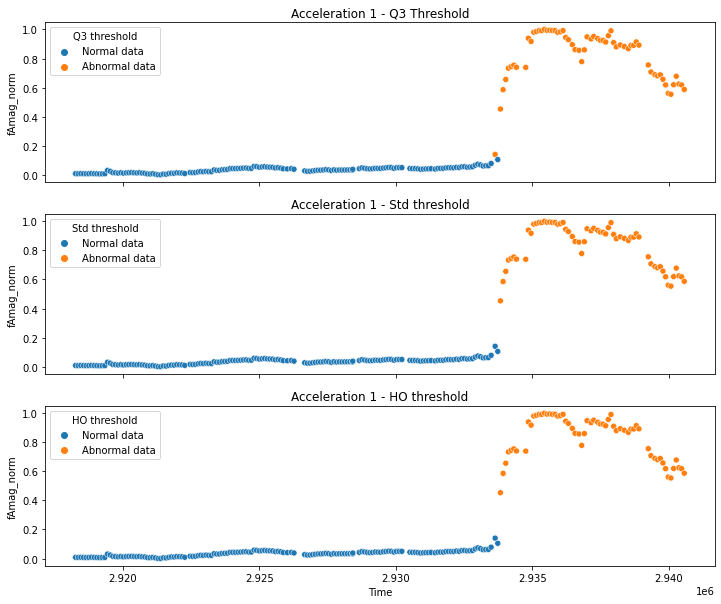

In [33]:
# Visualise the simple classification of normalised fAmag data.

hue_order = ['Normal data', 'Abnormal data']


fig, axes = plt.subplots(3,1, figsize=(12,10), sharex=True, sharey=True)

sns.scatterplot(data=Accel_1, ax=axes[0], x = 'Time', y = 'fAmag_norm', hue = 'Q3 threshold', hue_order= hue_order).set(title = 'Acceleration 1 - Q3 Threshold')
axes[0].set_xlabel('')

sns.scatterplot(data=Accel_1, ax=axes[1], x = 'Time', y = 'fAmag_norm', hue = 'Std threshold', hue_order= hue_order).set(title = 'Acceleration 1 - Std threshold')
axes[1].set_xlabel('')

sns.scatterplot(data=Accel_1, ax=axes[2], x = 'Time', y = 'fAmag_norm', hue = 'HO threshold', hue_order= hue_order).set(title = 'Acceleration 1 - HO threshold')




In [34]:
# Export as new CSV for Step 
Accel_1.to_csv('Accel_1_normal_vs_abnormal.csv')

## accel_7_fast_and_stop

In [35]:
# Import CVS files
accel_7_fast_and_stop = pd.read_csv('Accel_7_fast_and_stop_31_05_2022_cleaned.csv')

In [36]:
# Check the data
accel_7_fast_and_stop.info()
accel_7_fast_and_stop.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  130 non-null    int64  
 1   Timestamp   130 non-null    object 
 2   Data        130 non-null    object 
 3   AX          130 non-null    int64  
 4   AY          130 non-null    int64  
 5   AZ          130 non-null    int64  
 6   fAX         130 non-null    float64
 7   fAY         130 non-null    float64
 8   fAZ         130 non-null    float64
dtypes: float64(3), int64(4), object(2)
memory usage: 9.3+ KB


,Unnamed: 0,Timestamp,Data,AX,AY,AZ,fAX,fAY,fAZ
0,0,18:12:21:234,0001462415 [app] INFO: ACCEL:,-704,-480,576,26.766279,168.241196,8.758143
1,1,18:12:21:325,0001462551 [app] INFO: ACCEL:,-2016,1984,96,-3.032218,195.304382,10.175572
2,2,18:12:21:416,0001462641 [app] INFO: ACCEL:,-1024,-544,1824,-18.302029,184.058868,39.223648
3,3,18:12:21:507,0001462731 [app] INFO: ACCEL:,-960,-288,1600,-32.457813,176.883011,64.703102
4,4,18:12:21:603,0001462821 [app] INFO: ACCEL:,-1216,448,1792,-50.310703,180.980347,93.299789


In [37]:
# Function to calculate seconds
def get_seconds(time_str):
    hh, mm, ss , ms = time_str.split(':')
    return int(hh) * 3600 + int(mm) * 60 + int(ss) + int(ms) / 1000

In [38]:
# Write second calcutions to unnamed column and change column name
i = 0
for i in range(accel_7_fast_and_stop.shape[0]):
    accel_7_fast_and_stop.iloc[i,0] = get_seconds(accel_7_fast_and_stop.iloc[i,1])

In [39]:
# Rename the column as second
accel_7_fast_and_stop.rename(columns = {'Unnamed: 0':'time_seconds'}, inplace = True)

# Check the df tail
accel_7_fast_and_stop.tail()

,time_seconds,Timestamp,Data,AX,AY,AZ,fAX,fAY,fAZ
125,65572.692,18:12:52:692,0001493691 [app] INFO: ACCEL:,704,3360,-4448,312.166443,208.524948,-731.708069
126,65572.871,18:12:52:871,0001494096 [app] INFO: ACCEL:,-608,-864,-864,281.453430,168.326477,-738.467224
127,65573.096,18:12:53:096,0001494186 [app] INFO: ACCEL:,2080,-1472,-3392,340.579681,107.843437,-867.777893
128,65573.274,18:12:53:274,0001494411 [app] INFO: ACCEL:,1088,64,-1504,365.196198,106.235031,-898.833679
129,65573.364,18:12:53:364,0001494591 [app] INFO: ACCEL:,1184,160,32,391.681519,108.139221,-854.986511


In [40]:
# Adding time delta column
accel_7_fast_and_stop.insert(1,'time_seconds_delta','')

i = 1
for i in range(accel_7_fast_and_stop.shape[0]):
    accel_7_fast_and_stop.iloc[i,1] = (accel_7_fast_and_stop.iloc[i,0] - accel_7_fast_and_stop.iloc[i-1,0])
    
accel_7_fast_and_stop.iloc[0,1] = 0

In [41]:
# Checking the head of df
accel_7_fast_and_stop.head()

,time_seconds,time_seconds_delta,Timestamp,Data,AX,AY,AZ,fAX,fAY,fAZ
0,65541.234,0,18:12:21:234,0001462415 [app] INFO: ACCEL:,-704,-480,576,26.766279,168.241196,8.758143
1,65541.325,0.091,18:12:21:325,0001462551 [app] INFO: ACCEL:,-2016,1984,96,-3.032218,195.304382,10.175572
2,65541.416,0.091,18:12:21:416,0001462641 [app] INFO: ACCEL:,-1024,-544,1824,-18.302029,184.058868,39.223648
3,65541.507,0.091,18:12:21:507,0001462731 [app] INFO: ACCEL:,-960,-288,1600,-32.457813,176.883011,64.703102
4,65541.603,0.096,18:12:21:603,0001462821 [app] INFO: ACCEL:,-1216,448,1792,-50.310703,180.980347,93.299789


<AxesSubplot:xlabel='time_seconds_delta', ylabel='Count'>

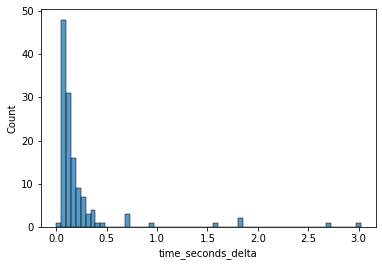

In [42]:
# Checking how does time_seconds_delta look like in histogram
sns.histplot(data=accel_7_fast_and_stop, x="time_seconds_delta")

In [43]:
# Adding a speed_change column
accel_7_fast_and_stop['speed_change'] = (accel_7_fast_and_stop['time_seconds_delta'] * accel_7_fast_and_stop['AX'])
accel_7_fast_and_stop['filtered_speed_change'] = (accel_7_fast_and_stop['time_seconds_delta'] * accel_7_fast_and_stop['fAX'])

In [44]:
# Checking range of speed change to understand how they define normal ride
# Check data types of new columns
accel_7_fast_and_stop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   time_seconds           130 non-null    float64
 1   time_seconds_delta     130 non-null    object 
 2   Timestamp              130 non-null    object 
 3   Data                   130 non-null    object 
 4   AX                     130 non-null    int64  
 5   AY                     130 non-null    int64  
 6   AZ                     130 non-null    int64  
 7   fAX                    130 non-null    float64
 8   fAY                    130 non-null    float64
 9   fAZ                    130 non-null    float64
 10  speed_change           130 non-null    object 
 11  filtered_speed_change  130 non-null    object 
dtypes: float64(4), int64(3), object(5)
memory usage: 12.3+ KB


In [45]:
# Change new column types as float for quantitative analysis
accel_7_fast_and_stop['time_seconds_delta'] = accel_7_fast_and_stop['time_seconds_delta'].astype(float)
accel_7_fast_and_stop['speed_change'] = accel_7_fast_and_stop['speed_change'].astype(float)
accel_7_fast_and_stop['filtered_speed_change'] = accel_7_fast_and_stop['filtered_speed_change'].astype(float)

In [46]:
# Checking descriptive statistics
accel_7_fast_and_stop.describe()

,time_seconds,time_seconds_delta,AX,AY,AZ,fAX,fAY,fAZ,speed_change,filtered_speed_change
count,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000
mean,65554.916438,0.247154,90.584615,123.323077,-310.153846,30.933625,122.630815,-255.409298,9.569231,-4.796562
std,10.704617,0.426722,2537.742431,2909.888285,3607.448974,153.177749,153.632143,371.400954,866.305835,69.996753
min,65541.234000,0.000000,-7552.000000,-13632.000000,-14080.000000,-249.896500,-637.742432,-1948.152466,-5452.544000,-491.205150
25%,65546.732250,0.091000,-952.000000,-744.000000,-1504.000000,-50.206300,97.321994,-429.819328,-118.456000,-5.922797
50%,65551.049000,0.134500,96.000000,272.000000,-336.000000,8.452180,146.113800,-119.140327,8.848000,0.816458
75%,65563.894000,0.216000,992.000000,1024.000000,952.000000,62.062187,184.391891,-14.724391,127.024000,13.235345
max,65573.364000,3.018000,16032.000000,11136.000000,17312.000000,613.334656,754.582275,364.405396,6084.288000,262.133570


<AxesSubplot:xlabel='speed_change', ylabel='Count'>

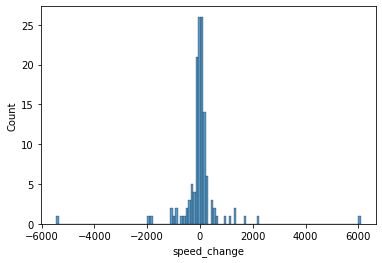

In [47]:
# Checking how does speed change look like in histogram
sns.histplot(data=accel_7_fast_and_stop, x="speed_change")

<AxesSubplot:xlabel='filtered_speed_change', ylabel='Count'>

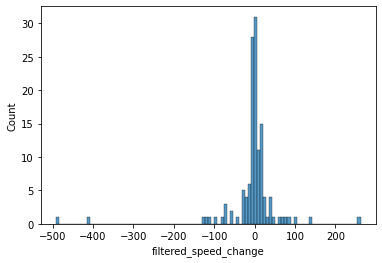

In [48]:
# Checking how does speed change look like in histogram
sns.histplot(data=accel_7_fast_and_stop, x="filtered_speed_change")

In [49]:
# Amag is equal to (Ax^2+Ay^2+Az^2)^.5
# Calculating Amag using acceleration data
accel_7_fast_and_stop['Amag'] = (accel_7_fast_and_stop['AX']**2 + accel_7_fast_and_stop['AY']**2 + accel_7_fast_and_stop['AZ']**2)**0.5
accel_7_fast_and_stop['fAmag'] = (accel_7_fast_and_stop['fAX']**2 + accel_7_fast_and_stop['fAY']**2 + accel_7_fast_and_stop['fAZ']**2)**0.5

### Note: 

- I use the 'Max-min'normalisation technique.
- Formula: x' = x - xmin/(xmax - xmin)

In [50]:
# Calculate normalised fAmag using 'Max-min' method.

accel_7_fast_and_stop['fAmag_norm'] = ((accel_7_fast_and_stop['fAmag'] - accel_7_fast_and_stop['fAmag'].min())/ 
                                     (accel_7_fast_and_stop['fAmag'].max() - accel_7_fast_and_stop['fAmag'].min()))


In [51]:
# Apply the different thresholds to data. 

# Q3 (75th percentile) threshold
accel_7_fast_and_stop['Q3 threshold'] = accel_7_fast_and_stop['fAmag_norm'].apply(Amag_Q3_threshold)

# Standard deviation threshold
accel_7_fast_and_stop['Std threshold'] = accel_7_fast_and_stop['fAmag_norm'].apply(Amag_std_threshold)

# High Outlier threshold
accel_7_fast_and_stop['HO threshold'] = accel_7_fast_and_stop['fAmag_norm'].apply(Amag_HO_threshold)

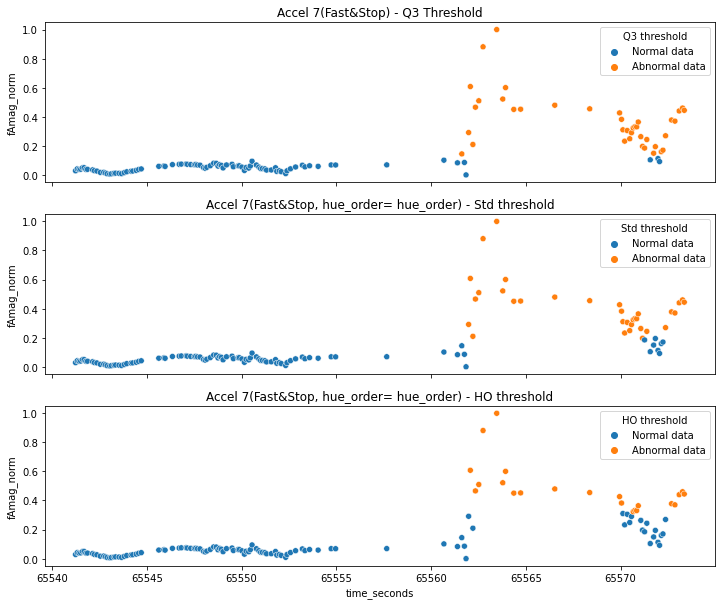

In [52]:
# Visualise the simple classification of normalised fAmag data.

hue_order = ['Normal data', 'Abnormal data']

fig, axes = plt.subplots(3,1, figsize=(12,10), sharex=True, sharey=True)

sns.scatterplot(data=accel_7_fast_and_stop, ax=axes[0], x = 'time_seconds', y = 'fAmag_norm', hue = 'Q3 threshold', hue_order= hue_order).set(title = 'Accel 7(Fast&Stop) - Q3 Threshold')
axes[0].set_xlabel('')

sns.scatterplot(data=accel_7_fast_and_stop, ax=axes[1], x = 'time_seconds', y = 'fAmag_norm', hue = 'Std threshold').set(title = 'Accel 7(Fast&Stop, hue_order= hue_order) - Std threshold')
axes[1].set_xlabel('')

sns.scatterplot(data=accel_7_fast_and_stop, ax=axes[2], x = 'time_seconds', y = 'fAmag_norm', hue = 'HO threshold').set(title = 'Accel 7(Fast&Stop, hue_order= hue_order) - HO threshold')

fig.savefig("Accel 7 Abnormalities_2.png")


In [53]:
accel_7_fast_and_stop_Q3_levels= accel_7_fast_and_stop.groupby('Q3 threshold').agg(
                                                               #Time_Start=('Timestamp', np.min),
                                                               #Time_End=('Timestamp', np.max),
                                                               Duration=('time_seconds_delta',np.sum))

accel_7_fast_and_stop_Q3_levels = accel_7_fast_and_stop_Q3_levels[accel_7_fast_and_stop_Q3_levels.index == 'Abnormal data']

accel_7_fast_and_stop_Q3_levels

,Duration
Q3 threshold,
Abnormal data,11.346


In [54]:
accel_7_fast_and_stop_Std_levels= accel_7_fast_and_stop.groupby('Std threshold').agg(
                                                               #Time_Start=('Timestamp', np.min),
                                                               #Time_End=('Timestamp', np.max),
                                                               Duration=('time_seconds_delta',np.sum))

accel_7_fast_and_stop_Std_levels = accel_7_fast_and_stop_Std_levels[accel_7_fast_and_stop_Std_levels.index == 'Abnormal data']

accel_7_fast_and_stop_Std_levels

,Duration
Std threshold,
Abnormal data,10.561


In [55]:
accel_7_fast_and_stop_HO_levels= accel_7_fast_and_stop.groupby('HO threshold').agg(
                                                               #Time_Start=('Timestamp', np.min),
                                                               #Time_End=('Timestamp', np.max),
                                                               Duration=('time_seconds_delta',np.sum))

accel_7_fast_and_stop_HO_levels = accel_7_fast_and_stop_HO_levels[accel_7_fast_and_stop_HO_levels.index == 'Abnormal data']

accel_7_fast_and_stop_HO_levels

,Duration
HO threshold,
Abnormal data,9.282


In [56]:
#Saving the dataframe as png
dfi.export(accel_7_fast_and_stop_Q3_levels.head(1),"accel_7_fast_and_stop_Q3_levels.png")
dfi.export(accel_7_fast_and_stop_Std_levels.head(1),"accel_7_fast_and_stop_Std_levels.png")
dfi.export(accel_7_fast_and_stop_HO_levels.head(1),"accel_7_fast_and_stop_HO_levels.png")

#dfi.export(accel_7_fast_and_stop_Q3_levels,"accel_7_fast_and_stop_Q3_levels.png")
#dfi.export(accel_7_fast_and_stop_Std_levels,"accel_7_fast_and_stop_Std_levels.png")
#dfi.export(accel_7_fast_and_stop_HO_levels,"accel_7_fast_and_stop_HO_levels.png")

objc[66714]: Class WebSwapCGLLayer is implemented in both /System/Library/Frameworks/WebKit.framework/Versions/A/Frameworks/WebCore.framework/Versions/A/Frameworks/libANGLE-shared.dylib (0x7ffb5ce87ec8) and /Applications/Google Chrome.app/Contents/Frameworks/Google Chrome Framework.framework/Versions/106.0.5249.119/Libraries/libGLESv2.dylib (0x105f27668). One of the two will be used. Which one is undefined.
[1025/150302.934991:INFO:headless_shell.cc(660)] Written to file /var/folders/5j/_w15pf392csd7_k6_373vp8m0000gn/T/tmp653kjs9w/temp.png.
objc[66730]: Class WebSwapCGLLayer is implemented in both /System/Library/Frameworks/WebKit.framework/Versions/A/Frameworks/WebCore.framework/Versions/A/Frameworks/libANGLE-shared.dylib (0x7ffb5ce87ec8) and /Applications/Google Chrome.app/Contents/Frameworks/Google Chrome Framework.framework/Versions/106.0.5249.119/Libraries/libGLESv2.dylib (0x110683668). One of the two will be used. Which one is undefined.
[1025/150303.709224:INFO:headless_shell.cc

In [57]:
# Export as new CSV for Step 3
accel_7_fast_and_stop.to_csv('accel_7_fast_and_stop_normal_vs_abnormal.csv')

## Gyro_4_throwing_bike

In [58]:
# Import CVS files
Gyro_4_throwing_bike = pd.read_csv('Gyro_4_throwing_bike_31_05_2022_cleaned.csv')

In [59]:
# Check the data
Gyro_4_throwing_bike.info()
Gyro_4_throwing_bike.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  182 non-null    int64  
 1   Timestamp   182 non-null    object 
 2   Data        182 non-null    object 
 3   X           182 non-null    float64
 4   Y           182 non-null    float64
 5   Z           182 non-null    float64
dtypes: float64(3), int64(1), object(2)
memory usage: 8.7+ KB


,Unnamed: 0,Timestamp,Data,X,Y,Z
177,177,18:56:00:990,0000344126 [app] INFO: GYRO:,-0.027,-0.033,-0.028
178,178,18:56:01:131,0000344261 [app] INFO: GYRO:,-0.027,-0.033,-0.028
179,179,18:56:01:216,0000344351 [app] INFO: GYRO:,-0.027,-0.033,-0.028
180,180,18:56:01:306,0000344441 [app] INFO: GYRO:,-0.027,-0.033,-0.028
181,181,18:56:01:396,0000344531 [app] INFO: GYRO:,-0.027,-0.033,-0.028


In [60]:
# Write second calcutions to unnamed column and change column name
i = 0
for i in range(Gyro_4_throwing_bike.shape[0]):
    Gyro_4_throwing_bike.iloc[i,0] = get_seconds(Gyro_4_throwing_bike.iloc[i,1])

In [61]:
# Rename the column as second
Gyro_4_throwing_bike.rename(columns = {'Unnamed: 0':'time_seconds'}, inplace = True)

# Check the df tail
Gyro_4_throwing_bike.tail()

,time_seconds,Timestamp,Data,X,Y,Z
177,68160.990,18:56:00:990,0000344126 [app] INFO: GYRO:,-0.027,-0.033,-0.028
178,68161.131,18:56:01:131,0000344261 [app] INFO: GYRO:,-0.027,-0.033,-0.028
179,68161.216,18:56:01:216,0000344351 [app] INFO: GYRO:,-0.027,-0.033,-0.028
180,68161.306,18:56:01:306,0000344441 [app] INFO: GYRO:,-0.027,-0.033,-0.028
181,68161.396,18:56:01:396,0000344531 [app] INFO: GYRO:,-0.027,-0.033,-0.028


In [62]:
# Adding time delta column
Gyro_4_throwing_bike.insert(1,'time_seconds_delta','')

i = 1
for i in range(Gyro_4_throwing_bike.shape[0]):
    Gyro_4_throwing_bike.iloc[i,1] = (Gyro_4_throwing_bike.iloc[i,0] - Gyro_4_throwing_bike.iloc[i-1,0])
    
Gyro_4_throwing_bike.iloc[0,1] = 0

In [63]:
# Checking the head of df
Gyro_4_throwing_bike.head()

,time_seconds,time_seconds_delta,Timestamp,Data,X,Y,Z
0,68143.665,0,18:55:43:665,0000326756 [app] INFO: GYRO:,-4.695,-0.52,19.148
1,68143.800,0.135,18:55:43:800,0000326898 [app] INFO: GYRO:,-4.695,-0.52,19.148
2,68143.891,0.091,18:55:43:891,0000327026 [app] INFO: GYRO:,-4.695,-0.52,19.148
3,68144.027,0.136,18:55:44:027,0000327116 [app] INFO: GYRO:,-4.695,-0.52,19.148
4,68144.117,0.09,18:55:44:117,0000327251 [app] INFO: GYRO:,-4.695,-0.52,19.148


In [64]:
# Change time_seconds_delta column as float for quantitative analysis
Gyro_4_throwing_bike['time_seconds_delta'] = Gyro_4_throwing_bike['time_seconds_delta'].astype(float)

In [65]:
# Checking descriptive statistics
Gyro_4_throwing_bike.describe()

,time_seconds,time_seconds_delta,X,Y,Z
count,182.000000,182.000000,182.000000,182.000000,182.000000
mean,68152.569462,0.097423,-2.867407,-0.271071,6.999632
std,5.122721,0.025345,4.521124,0.448857,9.984370
min,68143.665000,0.000000,-9.821000,-0.952000,-0.273000
25%,68148.324750,0.089000,-9.821000,-0.952000,-0.273000
50%,68152.488000,0.091000,0.351000,0.059000,-0.273000
75%,68157.042500,0.093000,0.351000,0.059000,21.029000
max,68161.396000,0.312000,0.351000,0.059000,21.029000


In [66]:
# Gmag is equal to (Gx^2+Gy^2+Gz^2)^.5
# Calculating Gmag using gyro data
Gyro_4_throwing_bike['Gmag'] = (Gyro_4_throwing_bike['X']**2 + Gyro_4_throwing_bike['Y']**2 + Gyro_4_throwing_bike['Z']**2)**0.5

In [67]:
# Calculate normalised Gmag using 'Max-min' method.

Gyro_4_throwing_bike['Gmag_norm'] = ((Gyro_4_throwing_bike['Gmag'] - Gyro_4_throwing_bike['Gmag'].min())/ 
                                     (Gyro_4_throwing_bike['Gmag'].max() - Gyro_4_throwing_bike['Gmag'].min()))


In [68]:
# Checking the head of df
Gyro_4_throwing_bike.head()

,time_seconds,time_seconds_delta,Timestamp,Data,X,Y,Z,Gmag,Gmag_norm
0,68143.665,0.000,18:55:43:665,0000326756 [app] INFO: GYRO:,-4.695,-0.52,19.148,19.722052,0.848702
1,68143.800,0.135,18:55:43:800,0000326898 [app] INFO: GYRO:,-4.695,-0.52,19.148,19.722052,0.848702
2,68143.891,0.091,18:55:43:891,0000327026 [app] INFO: GYRO:,-4.695,-0.52,19.148,19.722052,0.848702
3,68144.027,0.136,18:55:44:027,0000327116 [app] INFO: GYRO:,-4.695,-0.52,19.148,19.722052,0.848702
4,68144.117,0.090,18:55:44:117,0000327251 [app] INFO: GYRO:,-4.695,-0.52,19.148,19.722052,0.848702


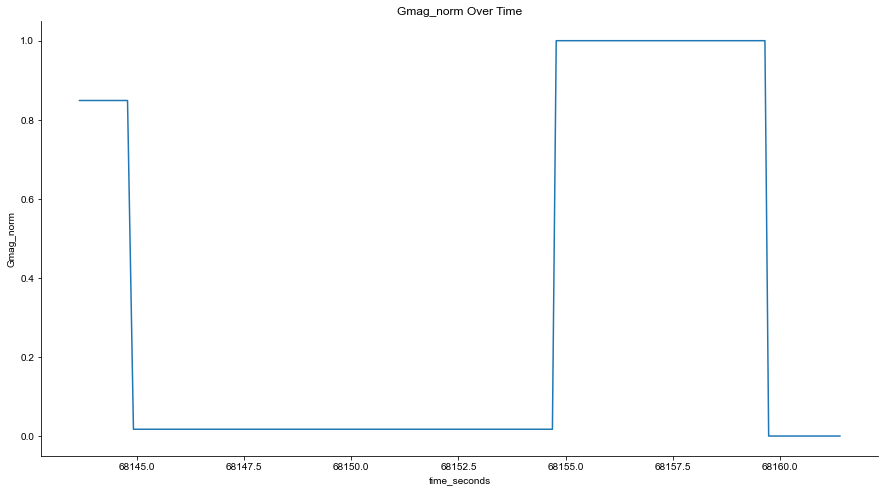

In [69]:
# Adjusting the size and adding title
plt.figure(figsize=(15,8))
plt.title('Gmag_norm Over Time')

# Imporve the DPI of the charts
plt.rcParams['figure.dpi'] = 144
plt.rcParams['savefig.dpi'] = 300
sns.set(rc={'figure.dpi':144, 'savefig.dpi':300})
sns.set_context('notebook')
sns.set_style('ticks')
sns.despine()

# Creating the line plot
ax=sns.lineplot(data=Gyro_4_throwing_bike, x='time_seconds', y='Gmag_norm')

#Saving the line plot
fig = ax.get_figure()
fig.patch.set_facecolor('white')
fig.savefig('Gyro_4_Gmag_norm Over Time.png')

In [70]:
# Check how long bike stayed in different Gmag Zones
Gyro4_Gmag_norm_levels = Gyro_4_throwing_bike.groupby('Gmag_norm').agg(
    Time_Start=('time_seconds', np.min),
    Time_End=('time_seconds', np.max),
    Duration=('time_seconds_delta',np.sum))

# View the df
Gyro4_Gmag_norm_levels

,Time_Start,Time_End,Duration
Gmag_norm,,,
0.000000,68159.730,68161.396,1.753
0.017152,68144.928,68154.691,9.901
0.848702,68143.665,68144.790,1.125
1.000000,68154.780,68159.643,4.952


In [71]:
#Saving the dataframe as png
dfi.export(Gyro4_Gmag_norm_levels,"Gyro4_Gmag_norm_levels.png")

objc[66775]: Class WebSwapCGLLayer is implemented in both /System/Library/Frameworks/WebKit.framework/Versions/A/Frameworks/WebCore.framework/Versions/A/Frameworks/libANGLE-shared.dylib (0x7ffb5ce87ec8) and /Applications/Google Chrome.app/Contents/Frameworks/Google Chrome Framework.framework/Versions/106.0.5249.119/Libraries/libGLESv2.dylib (0x118416668). One of the two will be used. Which one is undefined.
[1025/150307.679723:INFO:headless_shell.cc(660)] Written to file /var/folders/5j/_w15pf392csd7_k6_373vp8m0000gn/T/tmpygsf04by/temp.png.


In [72]:
# Create function to calculate the different thresholds level and return "classification data".
# Below tresholds are based on 1st normal ride file (1hr Normal Ride)

#def Gmag_Q3_thresholds(value):
    
#    if value > 0.191209:
#        return 'Abnormal data'
#    
#    else:
#        return 'Normal data'


# Create standard deviation threshold functions.

# If value is greater than the mean +/- the standard deviation (of the normal ride data)

#def Gmag_std_threshold(value):
    
#    if value > 0.140894 +0.168974:
#        return 'Abnormal data'
    
#    elif value < 0.140894 - 0.168974:
#        return 'Abnormal data'
#    else: 
#        return 'Normal data'

# Create high outlier threhsold function.

#def Gmag_HO_threshold(value):
    
#    if value > 0.433552:
#        return 'Abnormal data'
#    else:
#        return 'Normal data'

In [73]:
# Apply the different thresholds to data. 

# Q3 (75th percentile) threshold
Gyro_4_throwing_bike['Q3 threshold'] = Gyro_4_throwing_bike['Gmag_norm'].apply(Gmag_Q3_threshold)

# Standard deviation threshold
Gyro_4_throwing_bike['Std threshold'] = Gyro_4_throwing_bike['Gmag_norm'].apply(Gmag_std_threshold)

# High Outlier threshold
Gyro_4_throwing_bike['HO threshold'] = Gyro_4_throwing_bike['Gmag_norm'].apply(Gmag_HO_threshold)

In [74]:
# Preview the data.
Gyro_4_throwing_bike.head()

,time_seconds,time_seconds_delta,Timestamp,Data,X,Y,Z,Gmag,Gmag_norm,Q3 threshold,Std threshold,HO threshold
0,68143.665,0.000,18:55:43:665,0000326756 [app] INFO: GYRO:,-4.695,-0.52,19.148,19.722052,0.848702,Abnormal data,Abnormal data,Abnormal data
1,68143.800,0.135,18:55:43:800,0000326898 [app] INFO: GYRO:,-4.695,-0.52,19.148,19.722052,0.848702,Abnormal data,Abnormal data,Abnormal data
2,68143.891,0.091,18:55:43:891,0000327026 [app] INFO: GYRO:,-4.695,-0.52,19.148,19.722052,0.848702,Abnormal data,Abnormal data,Abnormal data
3,68144.027,0.136,18:55:44:027,0000327116 [app] INFO: GYRO:,-4.695,-0.52,19.148,19.722052,0.848702,Abnormal data,Abnormal data,Abnormal data
4,68144.117,0.090,18:55:44:117,0000327251 [app] INFO: GYRO:,-4.695,-0.52,19.148,19.722052,0.848702,Abnormal data,Abnormal data,Abnormal data


In [75]:
# Check the distribution of normal/abnormal for each threshold

print(Gyro_4_throwing_bike['Q3 threshold'].value_counts())
print(Gyro_4_throwing_bike['Std threshold'].value_counts())
print(Gyro_4_throwing_bike['HO threshold'].value_counts())

Normal data      119
Abnormal data     63
Name: Q3 threshold, dtype: int64
Normal data      119
Abnormal data     63
Name: Std threshold, dtype: int64
Normal data      119
Abnormal data     63
Name: HO threshold, dtype: int64


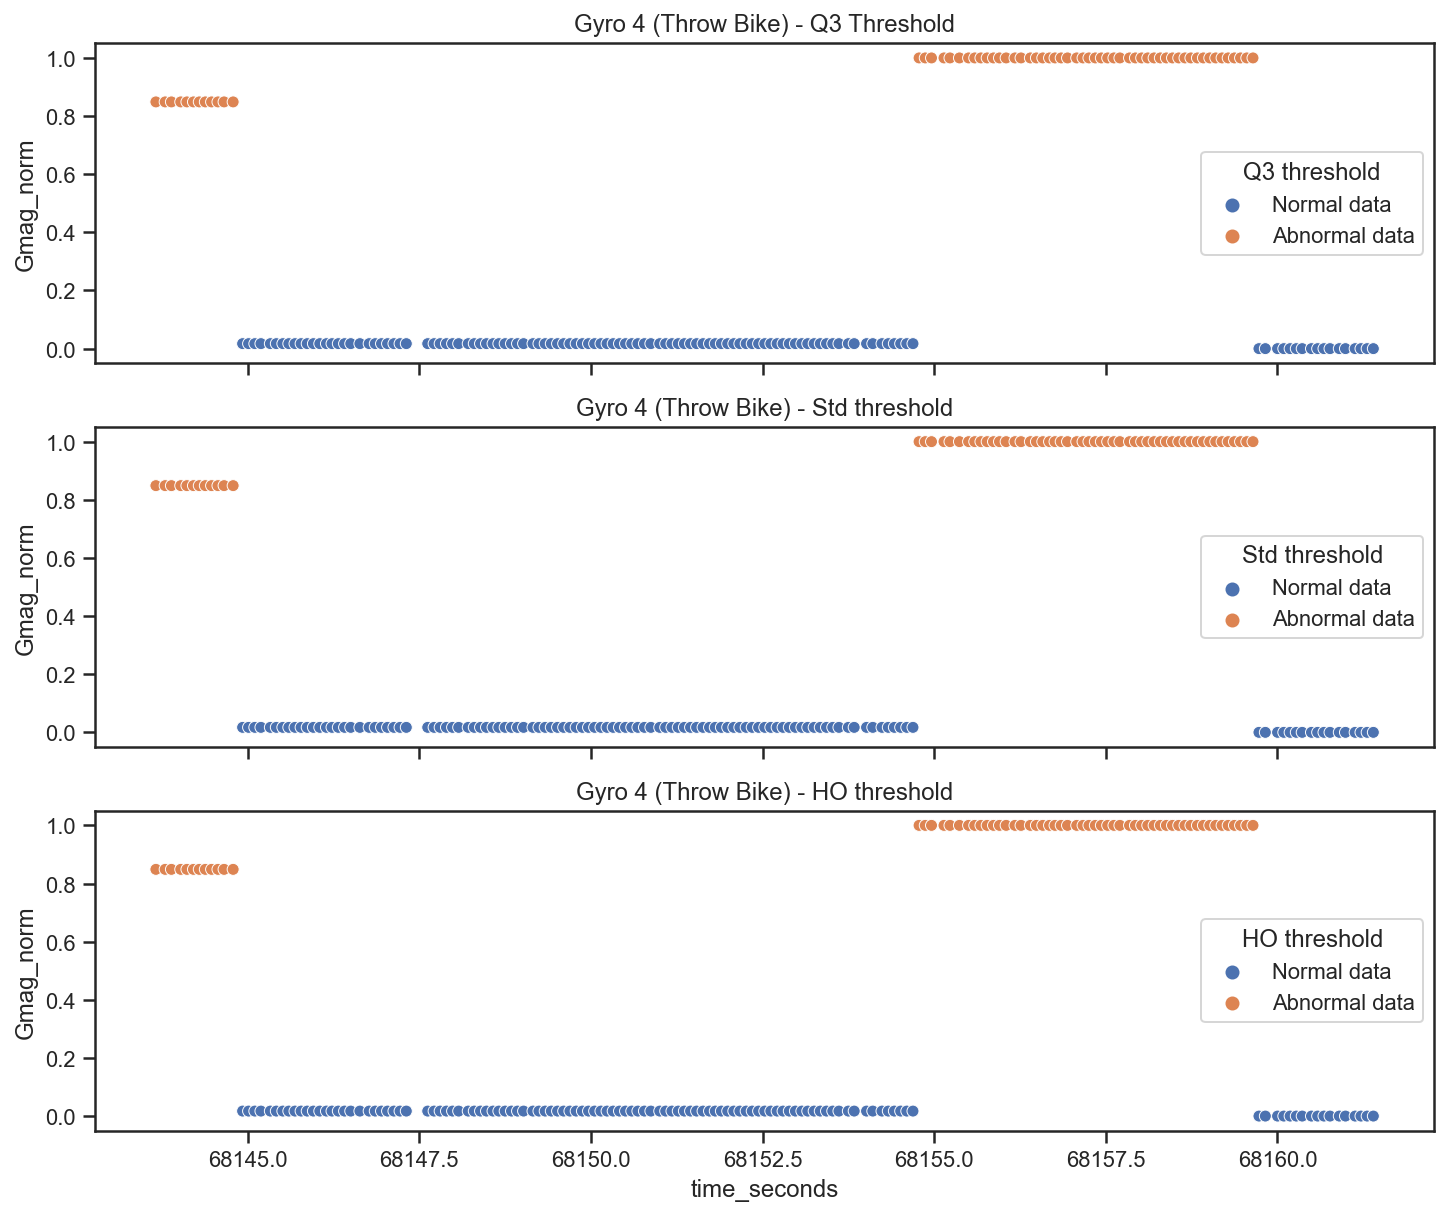

In [76]:
# Visualise the simple classification of normalised fAmag data.

hue_order = ['Normal data', 'Abnormal data']

fig, axes = plt.subplots(3,1, figsize=(12,10), sharex=True, sharey=True)

sns.scatterplot(data=Gyro_4_throwing_bike, ax=axes[0], x = 'time_seconds', y = 'Gmag_norm', hue = 'Q3 threshold', hue_order= hue_order).set(title = 'Gyro 4 (Throw Bike) - Q3 Threshold')
axes[0].set_xlabel('')

sns.scatterplot(data=Gyro_4_throwing_bike, ax=axes[1], x = 'time_seconds', y = 'Gmag_norm', hue = 'Std threshold', hue_order= hue_order).set(title = 'Gyro 4 (Throw Bike) - Std threshold')
axes[1].set_xlabel('')

sns.scatterplot(data=Gyro_4_throwing_bike, ax=axes[2], x = 'time_seconds', y = 'Gmag_norm', hue = 'HO threshold', hue_order= hue_order).set(title = 'Gyro 4 (Throw Bike) - HO threshold')

fig.savefig("Gyro_4_throwing_bike Abnormalities.png")


In [77]:
Gyro_4_throwing_bike_Q3_levels= Gyro_4_throwing_bike.groupby('Q3 threshold').agg(
                                                               #Time_Start=('Timestamp', np.min),
                                                               #Time_End=('Timestamp', np.max),
                                                               Duration=('time_seconds_delta',np.sum))

Gyro_4_throwing_bike_Q3_levels = Gyro_4_throwing_bike_Q3_levels[Gyro_4_throwing_bike_Q3_levels.index == 'Abnormal data']

Gyro_4_throwing_bike_Q3_levels

,Duration
Q3 threshold,
Abnormal data,6.077


In [78]:
Gyro_4_throwing_bike_Std_levels= Gyro_4_throwing_bike.groupby('Std threshold').agg(
                                                               #Time_Start=('Timestamp', np.min),
                                                               #Time_End=('Timestamp', np.max),
                                                               Duration=('time_seconds_delta',np.sum))

Gyro_4_throwing_bike_Std_levels = Gyro_4_throwing_bike_Std_levels[Gyro_4_throwing_bike_Std_levels.index == 'Abnormal data']

Gyro_4_throwing_bike_Std_levels

,Duration
Std threshold,
Abnormal data,6.077


In [79]:
Gyro_4_throwing_bike_HO_levels= Gyro_4_throwing_bike.groupby('HO threshold').agg(
                                                               #Time_Start=('Timestamp', np.min),
                                                               #Time_End=('Timestamp', np.max),
                                                               Duration=('time_seconds_delta',np.sum))

Gyro_4_throwing_bike_HO_levels = Gyro_4_throwing_bike_HO_levels[Gyro_4_throwing_bike_HO_levels.index == 'Abnormal data']

Gyro_4_throwing_bike_HO_levels

,Duration
HO threshold,
Abnormal data,6.077


In [80]:
#Saving the dataframe as png
dfi.export(Gyro_4_throwing_bike_Q3_levels.head(1),"Gyro_4_throwing_bike_Q3_levels.png")
dfi.export(Gyro_4_throwing_bike_Std_levels.head(1),"Gyro_4_throwing_bike_Std_levels.png")
dfi.export(Gyro_4_throwing_bike_HO_levels.head(1),"Gyro_4_throwing_bike_HO_levels.png")

#dfi.export(Gyro_4_throwing_bike_Q3_levels,"Gyro_4_throwing_bike_Q3_levels.png")
#dfi.export(Gyro_4_throwing_bike_Std_levels,"Gyro_4_throwing_bike_Std_levels.png")
#dfi.export(Gyro_4_throwing_bike_HO_levels,"Gyro_4_throwing_bike_HO_levels.png")

objc[66785]: Class WebSwapCGLLayer is implemented in both /System/Library/Frameworks/WebKit.framework/Versions/A/Frameworks/WebCore.framework/Versions/A/Frameworks/libANGLE-shared.dylib (0x7ffb5ce87ec8) and /Applications/Google Chrome.app/Contents/Frameworks/Google Chrome Framework.framework/Versions/106.0.5249.119/Libraries/libGLESv2.dylib (0x118a20668). One of the two will be used. Which one is undefined.
[1025/150309.947247:INFO:headless_shell.cc(660)] Written to file /var/folders/5j/_w15pf392csd7_k6_373vp8m0000gn/T/tmpybv4pp1q/temp.png.
objc[66798]: Class WebSwapCGLLayer is implemented in both /System/Library/Frameworks/WebKit.framework/Versions/A/Frameworks/WebCore.framework/Versions/A/Frameworks/libANGLE-shared.dylib (0x7ffb5ce87ec8) and /Applications/Google Chrome.app/Contents/Frameworks/Google Chrome Framework.framework/Versions/106.0.5249.119/Libraries/libGLESv2.dylib (0x11f08e668). One of the two will be used. Which one is undefined.
[1025/150310.688901:INFO:headless_shell.cc

In [81]:
# Export as new CSV for Step 3
Gyro_4_throwing_bike.to_csv('Gyro_4_throwing_bike_normal_vs_abnormal.csv')

## Gyro_5_throwing_bike

In [82]:
# Import CVS files
Gyro_5_throwing_bike = pd.read_csv('Gyro_5_throwing_bike_31_05_2022_cleaned.csv')

In [83]:
# Check the data
Gyro_5_throwing_bike.info()
Gyro_5_throwing_bike.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  97 non-null     int64  
 1   Timestamp   97 non-null     object 
 2   Data        97 non-null     object 
 3   X           97 non-null     float64
 4   Y           97 non-null     float64
 5   Z           97 non-null     float64
dtypes: float64(3), int64(1), object(2)
memory usage: 4.7+ KB


,Unnamed: 0,Timestamp,Data,X,Y,Z
92,92,18:56:47:115,0000390251 [app] INFO: GYRO:,0.807,0.062,0.522
93,93,18:56:47:210,0000390341 [app] INFO: GYRO:,0.807,0.062,0.522
94,94,18:56:47:296,0000390431 [app] INFO: GYRO:,0.807,0.062,0.522
95,95,18:56:47:389,0000390521 [app] INFO: GYRO:,0.807,0.062,0.522
96,96,18:56:47:525,0000390611 [app] INFO: GYRO:,0.807,0.062,0.522


In [84]:
# Write second calcutions to unnamed column and change column name
i = 0
for i in range(Gyro_5_throwing_bike.shape[0]):
    Gyro_5_throwing_bike.iloc[i,0] = get_seconds(Gyro_5_throwing_bike.iloc[i,1])

In [85]:
# Rename the column as second
Gyro_5_throwing_bike.rename(columns = {'Unnamed: 0':'time_seconds'}, inplace = True)

# Check the df tail
Gyro_5_throwing_bike.tail()

,time_seconds,Timestamp,Data,X,Y,Z
92,68207.115,18:56:47:115,0000390251 [app] INFO: GYRO:,0.807,0.062,0.522
93,68207.210,18:56:47:210,0000390341 [app] INFO: GYRO:,0.807,0.062,0.522
94,68207.296,18:56:47:296,0000390431 [app] INFO: GYRO:,0.807,0.062,0.522
95,68207.389,18:56:47:389,0000390521 [app] INFO: GYRO:,0.807,0.062,0.522
96,68207.525,18:56:47:525,0000390611 [app] INFO: GYRO:,0.807,0.062,0.522


In [86]:
# Adding time delta column
Gyro_5_throwing_bike.insert(1,'time_seconds_delta','')

i = 1
for i in range(Gyro_5_throwing_bike.shape[0]):
    Gyro_5_throwing_bike.iloc[i,1] = (Gyro_5_throwing_bike.iloc[i,0] - Gyro_5_throwing_bike.iloc[i-1,0])
    
Gyro_5_throwing_bike.iloc[0,1] = 0

In [87]:
# Checking the head of df
Gyro_5_throwing_bike.head()

,time_seconds,time_seconds_delta,Timestamp,Data,X,Y,Z
0,68196.812,0,18:56:36:812,0000379945 [app] INFO: GYRO:,0.066,0.027,0.901
1,68196.902,0.09,18:56:36:902,0000380036 [app] INFO: GYRO:,0.066,0.027,0.901
2,68196.992,0.09,18:56:36:992,0000380126 [app] INFO: GYRO:,0.066,0.027,0.901
3,68197.082,0.09,18:56:37:082,0000380216 [app] INFO: GYRO:,0.066,0.027,0.901
4,68197.171,0.089,18:56:37:171,0000380306 [app] INFO: GYRO:,0.066,0.027,0.901


In [88]:
# Change time_seconds_delta column as float for quantitative analysis
Gyro_5_throwing_bike['time_seconds_delta'] = Gyro_5_throwing_bike['time_seconds_delta'].astype(float)

In [89]:
# Checking descriptive statistics
Gyro_5_throwing_bike.describe()

,time_seconds,time_seconds_delta,X,Y,Z
count,97.000000,97.000000,97.000000,97.000000,97.000000
mean,68201.911474,0.110443,-2.615093,-0.944814,8.643577
std,3.156941,0.038398,3.187276,1.044640,8.369027
min,68196.812000,0.000000,-5.942000,-2.039000,0.522000
25%,68199.243000,0.089000,-5.942000,-2.039000,0.901000
50%,68201.760000,0.091000,0.066000,0.027000,0.901000
75%,68204.551000,0.134000,0.066000,0.027000,17.409000
max,68207.525000,0.315000,0.807000,0.062000,17.409000


In [90]:
# Gmag is equal to (Gx^2+Gy^2+Gz^2)^.5
# Calculating Gmag using gyro data
Gyro_5_throwing_bike['Gmag'] = (Gyro_5_throwing_bike['X']**2 + Gyro_5_throwing_bike['Y']**2 + Gyro_5_throwing_bike['Z']**2)**0.5

In [91]:
# Calculate normalised Gmag using 'Max-min' method.

Gyro_5_throwing_bike['Gmag_norm'] = ((Gyro_5_throwing_bike['Gmag'] - Gyro_5_throwing_bike['Gmag'].min())/ 
                                     (Gyro_5_throwing_bike['Gmag'].max() - Gyro_5_throwing_bike['Gmag'].min()))


In [92]:
# Checking the head of df
Gyro_5_throwing_bike.head()

,time_seconds,time_seconds_delta,Timestamp,Data,X,Y,Z,Gmag,Gmag_norm
0,68196.812,0.000,18:56:36:812,0000379945 [app] INFO: GYRO:,0.066,0.027,0.901,0.903817,0.0
1,68196.902,0.090,18:56:36:902,0000380036 [app] INFO: GYRO:,0.066,0.027,0.901,0.903817,0.0
2,68196.992,0.090,18:56:36:992,0000380126 [app] INFO: GYRO:,0.066,0.027,0.901,0.903817,0.0
3,68197.082,0.090,18:56:37:082,0000380216 [app] INFO: GYRO:,0.066,0.027,0.901,0.903817,0.0
4,68197.171,0.089,18:56:37:171,0000380306 [app] INFO: GYRO:,0.066,0.027,0.901,0.903817,0.0


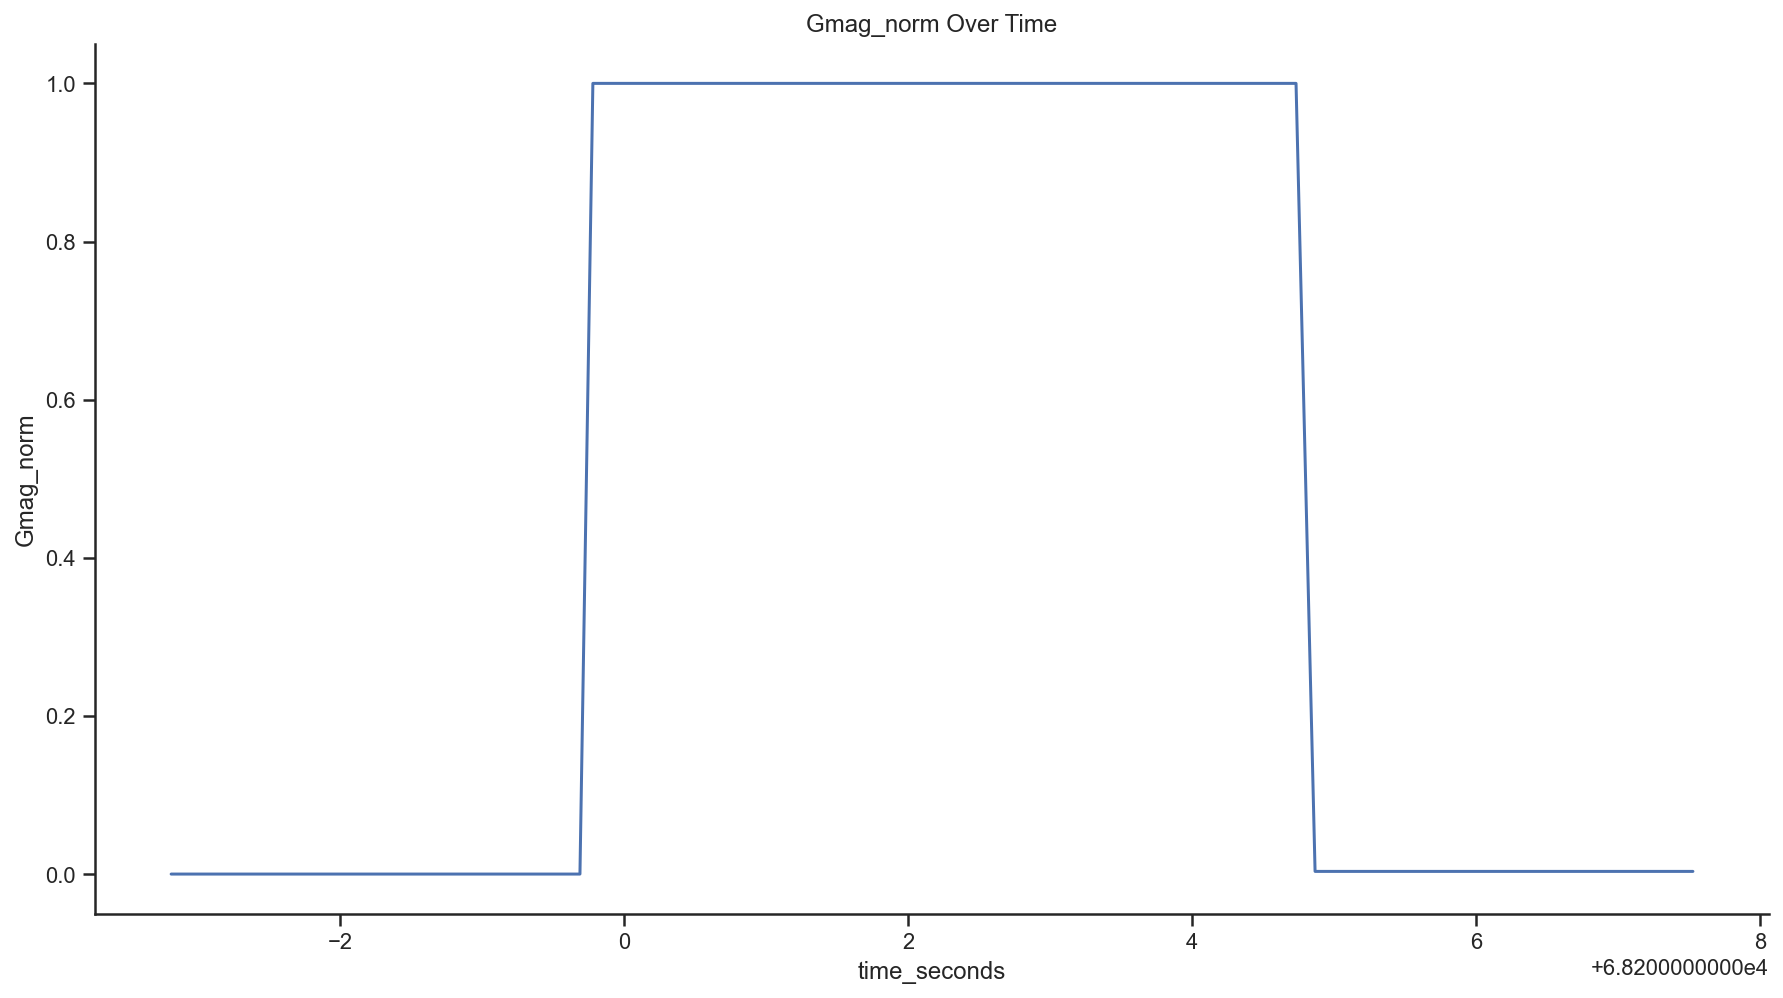

In [93]:
# Adjusting the size and adding title
plt.figure(figsize=(15,8))
plt.title('Gmag_norm Over Time')

# Imporve the DPI of the charts
plt.rcParams['figure.dpi'] = 144
plt.rcParams['savefig.dpi'] = 300
sns.set(rc={'figure.dpi':144, 'savefig.dpi':300})
sns.set_context('notebook')
sns.set_style('ticks')
sns.despine()

# Creating the line plot
ax=sns.lineplot(data=Gyro_5_throwing_bike, x='time_seconds', y='Gmag_norm')

#Saving the line plot
fig = ax.get_figure()
fig.patch.set_facecolor('white')
fig.savefig('Gyro_5_Gmag_norm Over Time.png')

In [94]:
# Check how long bike stayed in different Gmag Zones
Gyro5_Gmag_norm_levels = Gyro_5_throwing_bike.groupby('Gmag_norm').agg(
    Time_Start=('time_seconds', np.min),
    Time_End=('time_seconds', np.max),
    Duration=('time_seconds_delta',np.sum))

# View the df
Gyro5_Gmag_norm_levels

,Time_Start,Time_End,Duration
Gmag_norm,,,
0.000000,68196.812,68199.690,2.878
0.003368,68204.865,68207.525,2.794
1.000000,68199.781,68204.731,5.041


In [95]:
#Saving the dataframe as png
dfi.export(Gyro5_Gmag_norm_levels,"Gyro5_Gmag_norm_levels.png")

objc[66821]: Class WebSwapCGLLayer is implemented in both /System/Library/Frameworks/WebKit.framework/Versions/A/Frameworks/WebCore.framework/Versions/A/Frameworks/libANGLE-shared.dylib (0x7ffb5ce87ec8) and /Applications/Google Chrome.app/Contents/Frameworks/Google Chrome Framework.framework/Versions/106.0.5249.119/Libraries/libGLESv2.dylib (0x113bda668). One of the two will be used. Which one is undefined.
[1025/150313.961625:INFO:headless_shell.cc(660)] Written to file /var/folders/5j/_w15pf392csd7_k6_373vp8m0000gn/T/tmp8v__wm51/temp.png.


In [96]:
# Apply the different thresholds to data. 

# Q3 (75th percentile) threshold
Gyro_5_throwing_bike['Q3 threshold'] = Gyro_5_throwing_bike['Gmag_norm'].apply(Gmag_Q3_threshold)

# Standard deviation threshold
Gyro_5_throwing_bike['Std threshold'] = Gyro_5_throwing_bike['Gmag_norm'].apply(Gmag_std_threshold)

# High Outlier threshold
Gyro_5_throwing_bike['HO threshold'] = Gyro_5_throwing_bike['Gmag_norm'].apply(Gmag_HO_threshold)

In [97]:
# Preview the data.
Gyro_5_throwing_bike.head()

,time_seconds,time_seconds_delta,Timestamp,Data,X,Y,Z,Gmag,Gmag_norm,Q3 threshold,Std threshold,HO threshold
0,68196.812,0.000,18:56:36:812,0000379945 [app] INFO: GYRO:,0.066,0.027,0.901,0.903817,0.0,Normal data,Normal data,Normal data
1,68196.902,0.090,18:56:36:902,0000380036 [app] INFO: GYRO:,0.066,0.027,0.901,0.903817,0.0,Normal data,Normal data,Normal data
2,68196.992,0.090,18:56:36:992,0000380126 [app] INFO: GYRO:,0.066,0.027,0.901,0.903817,0.0,Normal data,Normal data,Normal data
3,68197.082,0.090,18:56:37:082,0000380216 [app] INFO: GYRO:,0.066,0.027,0.901,0.903817,0.0,Normal data,Normal data,Normal data
4,68197.171,0.089,18:56:37:171,0000380306 [app] INFO: GYRO:,0.066,0.027,0.901,0.903817,0.0,Normal data,Normal data,Normal data


In [98]:
# Check the distribution of normal/abnormal for each threshold

print(Gyro_5_throwing_bike['Q3 threshold'].value_counts())
print(Gyro_5_throwing_bike['Std threshold'].value_counts())
print(Gyro_5_throwing_bike['HO threshold'].value_counts())

Normal data      51
Abnormal data    46
Name: Q3 threshold, dtype: int64
Normal data      51
Abnormal data    46
Name: Std threshold, dtype: int64
Normal data      51
Abnormal data    46
Name: HO threshold, dtype: int64


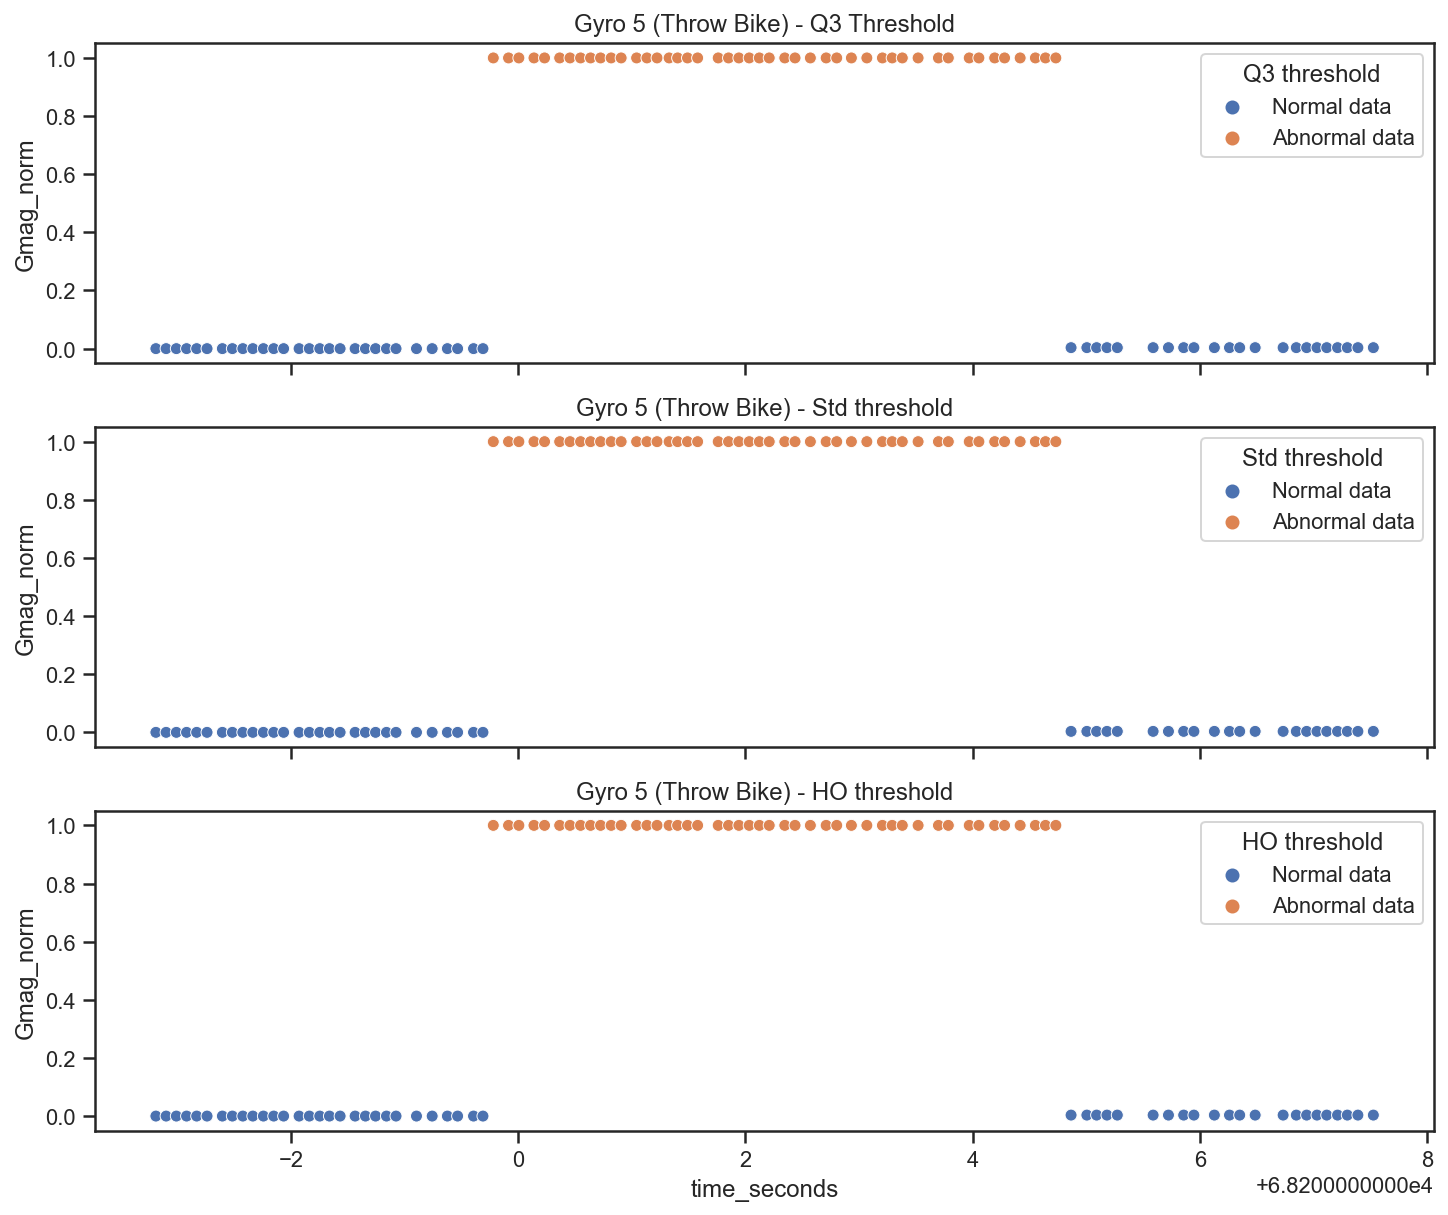

In [99]:
# Visualise the simple classification of normalised fAmag data.

hue_order = ['Normal data', 'Abnormal data']

fig, axes = plt.subplots(3,1, figsize=(12,10), sharex=True, sharey=True)

sns.scatterplot(data=Gyro_5_throwing_bike, ax=axes[0], x = 'time_seconds', y = 'Gmag_norm', hue = 'Q3 threshold', hue_order= hue_order).set(title = 'Gyro 5 (Throw Bike) - Q3 Threshold')
axes[0].set_xlabel('')

sns.scatterplot(data=Gyro_5_throwing_bike, ax=axes[1], x = 'time_seconds', y = 'Gmag_norm', hue = 'Std threshold', hue_order= hue_order).set(title = 'Gyro 5 (Throw Bike) - Std threshold')
axes[1].set_xlabel('')

sns.scatterplot(data=Gyro_5_throwing_bike, ax=axes[2], x = 'time_seconds', y = 'Gmag_norm', hue = 'HO threshold', hue_order= hue_order).set(title = 'Gyro 5 (Throw Bike) - HO threshold')

fig.savefig("Gyro_5_throwing_bike Abnormalities.png")


In [100]:
Gyro_5_throwing_bike_Q3_levels= Gyro_5_throwing_bike.groupby('Q3 threshold').agg(
                                                               #Time_Start=('Timestamp', np.min),
                                                               #Time_End=('Timestamp', np.max),
                                                               Duration=('time_seconds_delta',np.sum))

Gyro_5_throwing_bike_Q3_levels = Gyro_5_throwing_bike_Q3_levels[Gyro_5_throwing_bike_Q3_levels.index == 'Abnormal data']

Gyro_5_throwing_bike_Q3_levels

,Duration
Q3 threshold,
Abnormal data,5.041


In [101]:
Gyro_5_throwing_bike_Std_levels= Gyro_5_throwing_bike.groupby('Std threshold').agg(
                                                               #Time_Start=('Timestamp', np.min),
                                                               #Time_End=('Timestamp', np.max),
                                                               Duration=('time_seconds_delta',np.sum))

Gyro_5_throwing_bike_Std_levels = Gyro_5_throwing_bike_Std_levels[Gyro_5_throwing_bike_Std_levels.index == 'Abnormal data']

Gyro_5_throwing_bike_Std_levels

,Duration
Std threshold,
Abnormal data,5.041


In [102]:
Gyro_5_throwing_bike_HO_levels= Gyro_5_throwing_bike.groupby('HO threshold').agg(
                                                               #Time_Start=('Timestamp', np.min),
                                                               #Time_End=('Timestamp', np.max),
                                                               Duration=('time_seconds_delta',np.sum))

Gyro_5_throwing_bike_HO_levels = Gyro_5_throwing_bike_HO_levels[Gyro_5_throwing_bike_HO_levels.index == 'Abnormal data']

Gyro_5_throwing_bike_HO_levels

,Duration
HO threshold,
Abnormal data,5.041


In [103]:
#Saving the dataframe as png
dfi.export(Gyro_5_throwing_bike_Q3_levels.head(1),"Gyro_5_throwing_bike_Q3_levels.png")
dfi.export(Gyro_5_throwing_bike_Std_levels.head(1),"Gyro_5_throwing_bike_Std_levels.png")
dfi.export(Gyro_5_throwing_bike_HO_levels.head(1),"Gyro_5_throwing_bike_HO_levels.png")

#Saving the dataframe as png
#dfi.export(Gyro_5_throwing_bike_Q3_levels,"Gyro_5_throwing_bike_Q3_levels.png")
#dfi.export(Gyro_5_throwing_bike_Std_levels,"Gyro_5_throwing_bike_Std_levels.png")
#dfi.export(Gyro_5_throwing_bike_HO_levels,"Gyro_5_throwing_bike_HO_levels.png")

objc[66838]: Class WebSwapCGLLayer is implemented in both /System/Library/Frameworks/WebKit.framework/Versions/A/Frameworks/WebCore.framework/Versions/A/Frameworks/libANGLE-shared.dylib (0x7ffb5ce87ec8) and /Applications/Google Chrome.app/Contents/Frameworks/Google Chrome Framework.framework/Versions/106.0.5249.119/Libraries/libGLESv2.dylib (0x11c051668). One of the two will be used. Which one is undefined.
[1025/150316.510399:INFO:headless_shell.cc(660)] Written to file /var/folders/5j/_w15pf392csd7_k6_373vp8m0000gn/T/tmp7c6izbhq/temp.png.
objc[66852]: Class WebSwapCGLLayer is implemented in both /System/Library/Frameworks/WebKit.framework/Versions/A/Frameworks/WebCore.framework/Versions/A/Frameworks/libANGLE-shared.dylib (0x7ffb5ce87ec8) and /Applications/Google Chrome.app/Contents/Frameworks/Google Chrome Framework.framework/Versions/106.0.5249.119/Libraries/libGLESv2.dylib (0x10b8e4668). One of the two will be used. Which one is undefined.
[1025/150317.410147:INFO:headless_shell.cc

In [104]:
# Export as new CSV for Step 3
Gyro_5_throwing_bike.to_csv('Gyro_5_throwing_bike_normal_vs_abnormal.csv')

## Accel 8_Curb_Up Analysis

In [105]:
# Import CSV files
accel_8_curb_up = pd.read_csv('Accel_8_curb_up_31_05_2022_cleaned.csv')

In [106]:
# Check the data
accel_8_curb_up.info()
accel_8_curb_up.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  93 non-null     int64  
 1   Timestamp   93 non-null     object 
 2   AX          93 non-null     int64  
 3   AY          93 non-null     int64  
 4   AZ          93 non-null     int64  
 5   fAX         93 non-null     float64
 6   fAY         93 non-null     float64
 7   fAZ         93 non-null     float64
dtypes: float64(3), int64(4), object(1)
memory usage: 5.9+ KB


,Unnamed: 0,Timestamp,AX,AY,AZ,fAX,fAY,fAZ
0,0,18:15:17:321,-1984,-1184,-128,10.911464,20.143747,38.438805
1,1,18:15:21:642,1120,1504,-608,5.466331,39.520996,30.415575
2,2,18:15:22:408,-2144,-2048,960,-33.589970,1.751053,42.425961
3,3,18:15:22:720,-3552,-1696,384,-99.028473,-29.657183,46.862812
4,4,18:15:23:036,-2880,-2720,2880,-153.310471,-80.152374,83.436729


In [107]:
# Convert timestamp to datetime
accel_8_curb_up['Timestamp'] = pd.to_datetime(accel_8_curb_up['Timestamp'], format='%H:%M:%S:%f')

In [108]:
#Check df after datetime conversion
accel_8_curb_up.info()
accel_8_curb_up.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  93 non-null     int64         
 1   Timestamp   93 non-null     datetime64[ns]
 2   AX          93 non-null     int64         
 3   AY          93 non-null     int64         
 4   AZ          93 non-null     int64         
 5   fAX         93 non-null     float64       
 6   fAY         93 non-null     float64       
 7   fAZ         93 non-null     float64       
dtypes: datetime64[ns](1), float64(3), int64(4)
memory usage: 5.9 KB


,Unnamed: 0,Timestamp,AX,AY,AZ,fAX,fAY,fAZ
0,0,1900-01-01 18:15:17.321,-1984,-1184,-128,10.911464,20.143747,38.438805
1,1,1900-01-01 18:15:21.642,1120,1504,-608,5.466331,39.520996,30.415575
2,2,1900-01-01 18:15:22.408,-2144,-2048,960,-33.589970,1.751053,42.425961
3,3,1900-01-01 18:15:22.720,-3552,-1696,384,-99.028473,-29.657183,46.862812
4,4,1900-01-01 18:15:23.036,-2880,-2720,2880,-153.310471,-80.152374,83.436729


In [109]:
# Converting timestamps to seconds_Assuming starting from 0 seconds
i = 0
for i in range(accel_8_curb_up.shape[0]):
    accel_8_curb_up.iloc[i,0] = (accel_8_curb_up.iloc[i,1] - accel_8_curb_up.iloc[0,1]).total_seconds()

In [110]:
# Formatting the df and checking the head
accel_8_curb_up.rename(columns = {'Unnamed: 0':'time_seconds'}, inplace = True)
accel_8_curb_up.head()

,time_seconds,Timestamp,AX,AY,AZ,fAX,fAY,fAZ
0,0.000,1900-01-01 18:15:17.321,-1984,-1184,-128,10.911464,20.143747,38.438805
1,4.321,1900-01-01 18:15:21.642,1120,1504,-608,5.466331,39.520996,30.415575
2,5.087,1900-01-01 18:15:22.408,-2144,-2048,960,-33.589970,1.751053,42.425961
3,5.399,1900-01-01 18:15:22.720,-3552,-1696,384,-99.028473,-29.657183,46.862812
4,5.715,1900-01-01 18:15:23.036,-2880,-2720,2880,-153.310471,-80.152374,83.436729


In [111]:
# Adding time delta column - this is the time in seconds between each data row
accel_8_curb_up.insert(1,'time_seconds_delta','')

i = 1
for i in range(accel_8_curb_up.shape[0]):
    accel_8_curb_up.iloc[i,1] = (accel_8_curb_up.iloc[i,0] - accel_8_curb_up.iloc[i-1,0])
    
accel_8_curb_up.iloc[0,1] = 0

In [112]:
# Amag is equal to (Ax^2+Ay^2+Az^2)^.5
# Calculating Amag using acceleration data
accel_8_curb_up['Amag'] = (accel_8_curb_up['AX']**2 + accel_8_curb_up['AY']**2 + accel_8_curb_up['AZ']**2)**0.5
accel_8_curb_up['fAmag'] = (accel_8_curb_up['fAX']**2 + accel_8_curb_up['fAY']**2 + accel_8_curb_up['fAZ']**2)**0.5

In [113]:
# Check df
accel_8_curb_up.info()
accel_8_curb_up.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   time_seconds        93 non-null     float64       
 1   time_seconds_delta  93 non-null     object        
 2   Timestamp           93 non-null     datetime64[ns]
 3   AX                  93 non-null     int64         
 4   AY                  93 non-null     int64         
 5   AZ                  93 non-null     int64         
 6   fAX                 93 non-null     float64       
 7   fAY                 93 non-null     float64       
 8   fAZ                 93 non-null     float64       
 9   Amag                93 non-null     float64       
 10  fAmag               93 non-null     float64       
dtypes: datetime64[ns](1), float64(6), int64(3), object(1)
memory usage: 8.1+ KB


,time_seconds,time_seconds_delta,Timestamp,AX,AY,AZ,fAX,fAY,fAZ,Amag,fAmag
0,0.000,0,1900-01-01 18:15:17.321,-1984,-1184,-128,10.911464,20.143747,38.438805,2313.978392,44.747875
1,4.321,4.321,1900-01-01 18:15:21.642,1120,1504,-608,5.466331,39.520996,30.415575,1971.314282,50.168686
2,5.087,0.766,1900-01-01 18:15:22.408,-2144,-2048,960,-33.589970,1.751053,42.425961,3116.510870,54.141615
3,5.399,0.312,1900-01-01 18:15:22.720,-3552,-1696,384,-99.028473,-29.657183,46.862812,3954.816810,113.500265
4,5.715,0.316,1900-01-01 18:15:23.036,-2880,-2720,2880,-153.310471,-80.152374,83.436729,4897.672917,192.068194


In [114]:
# normalise famag
accel_8_curb_up['fAmag_norm'] = ((accel_8_curb_up['fAmag'] - accel_8_curb_up['fAmag'].min())/ 
                                     (accel_8_curb_up['fAmag'].max() - accel_8_curb_up['fAmag'].min()))

In [115]:
# run thresholds
accel_8_curb_up['Std threshold'] = accel_8_curb_up['fAmag_norm'].apply(Amag_std_threshold)
accel_8_curb_up['Q3 threshold'] = accel_8_curb_up['fAmag_norm'].apply(Amag_Q3_threshold)
accel_8_curb_up['HO threshold'] = accel_8_curb_up['fAmag_norm'].apply(Amag_HO_threshold)

In [116]:
# Check df
accel_8_curb_up.info()
accel_8_curb_up.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   time_seconds        93 non-null     float64       
 1   time_seconds_delta  93 non-null     object        
 2   Timestamp           93 non-null     datetime64[ns]
 3   AX                  93 non-null     int64         
 4   AY                  93 non-null     int64         
 5   AZ                  93 non-null     int64         
 6   fAX                 93 non-null     float64       
 7   fAY                 93 non-null     float64       
 8   fAZ                 93 non-null     float64       
 9   Amag                93 non-null     float64       
 10  fAmag               93 non-null     float64       
 11  fAmag_norm          93 non-null     float64       
 12  Std threshold       93 non-null     object        
 13  Q3 threshold        93 non-null     object        
 

,time_seconds,time_seconds_delta,Timestamp,AX,AY,AZ,fAX,fAY,fAZ,Amag,fAmag,fAmag_norm,Std threshold,Q3 threshold,HO threshold
0,0.000,0,1900-01-01 18:15:17.321,-1984,-1184,-128,10.911464,20.143747,38.438805,2313.978392,44.747875,0.000000,Normal data,Normal data,Normal data
1,4.321,4.321,1900-01-01 18:15:21.642,1120,1504,-608,5.466331,39.520996,30.415575,1971.314282,50.168686,0.003468,Normal data,Normal data,Normal data
2,5.087,0.766,1900-01-01 18:15:22.408,-2144,-2048,960,-33.589970,1.751053,42.425961,3116.510870,54.141615,0.006010,Normal data,Normal data,Normal data
3,5.399,0.312,1900-01-01 18:15:22.720,-3552,-1696,384,-99.028473,-29.657183,46.862812,3954.816810,113.500265,0.043984,Normal data,Normal data,Normal data
4,5.715,0.316,1900-01-01 18:15:23.036,-2880,-2720,2880,-153.310471,-80.152374,83.436729,4897.672917,192.068194,0.094247,Normal data,Normal data,Normal data


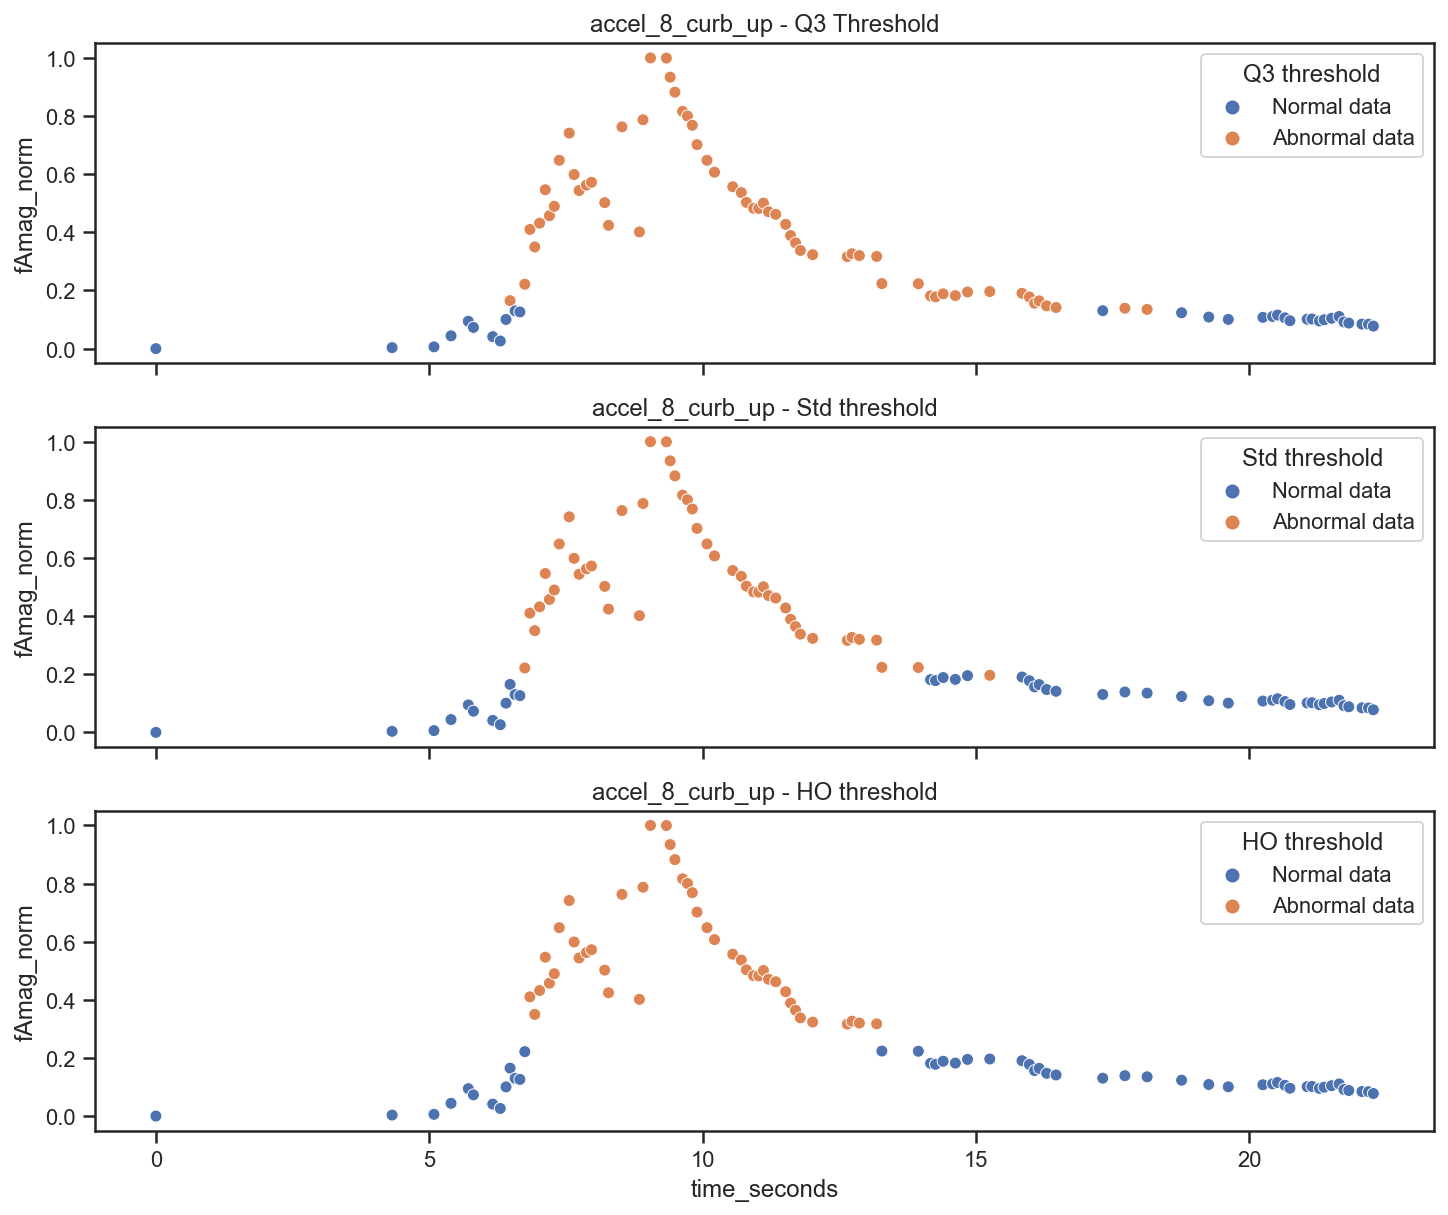

In [117]:
# Visualise the simple classification of normalised fAmag data.


fig, axes = plt.subplots(3,1, figsize=(12,10), sharex=True, sharey=True)

sns.scatterplot(data=accel_8_curb_up, ax=axes[0], x = 'time_seconds', y = 'fAmag_norm', hue = 'Q3 threshold').set(title = 'accel_8_curb_up - Q3 Threshold')
axes[0].set_xlabel('')

sns.scatterplot(data=accel_8_curb_up, ax=axes[1], x = 'time_seconds', y = 'fAmag_norm', hue = 'Std threshold').set(title = 'accel_8_curb_up - Std threshold')
axes[1].set_xlabel('')

sns.scatterplot(data=accel_8_curb_up, ax=axes[2], x = 'time_seconds', y = 'fAmag_norm', hue = 'HO threshold').set(title = 'accel_8_curb_up - HO threshold')

fig.savefig("Accel 8 Abnormalities.png")

In [118]:
#calculating length of time of abnormal data
accel_8_curb_up_Q3_levels= accel_8_curb_up.groupby('Q3 threshold').agg(Duration=('time_seconds_delta',np.sum))

accel_8_curb_up_Q3_levels= accel_8_curb_up_Q3_levels[accel_8_curb_up_Q3_levels.index =="Abnormal data"]

accel_8_curb_up_Q3_levels

,Duration
Q3 threshold,
Abnormal data,10.693


In [119]:
#calculating length of time of abnormal data
accel_8_curb_up_Std_levels= accel_8_curb_up.groupby('Std threshold').agg(Duration=('time_seconds_delta',np.sum))

accel_8_curb_up_Std_levels= accel_8_curb_up_Std_levels[accel_8_curb_up_Std_levels.index =="Abnormal data"]

accel_8_curb_up_Std_levels

,Duration
Std threshold,
Abnormal data,7.696


In [120]:
#calculating length of time of abnormal data
accel_8_curb_up_HO_levels= accel_8_curb_up.groupby('HO threshold').agg(Duration=('time_seconds_delta',np.sum))

accel_8_curb_up_HO_levels= accel_8_curb_up_HO_levels[accel_8_curb_up_HO_levels.index =="Abnormal data"]

accel_8_curb_up_HO_levels

,Duration
HO threshold,
Abnormal data,6.437


In [121]:
#Saving the dataframe as png
dfi.export(accel_8_curb_up_Q3_levels,"accel_8_curb_up_Q3_levels.png")
dfi.export(accel_8_curb_up_Std_levels,"accel_8_curb_up_Std_levels.png")
dfi.export(accel_8_curb_up_HO_levels,"accel_8_curb_up_HO_levels.png")

objc[66871]: Class WebSwapCGLLayer is implemented in both /System/Library/Frameworks/WebKit.framework/Versions/A/Frameworks/WebCore.framework/Versions/A/Frameworks/libANGLE-shared.dylib (0x7ffb5ce87ec8) and /Applications/Google Chrome.app/Contents/Frameworks/Google Chrome Framework.framework/Versions/106.0.5249.119/Libraries/libGLESv2.dylib (0x1166c8668). One of the two will be used. Which one is undefined.
[1025/150321.710554:INFO:headless_shell.cc(660)] Written to file /var/folders/5j/_w15pf392csd7_k6_373vp8m0000gn/T/tmp5exwnyau/temp.png.
objc[66882]: Class WebSwapCGLLayer is implemented in both /System/Library/Frameworks/WebKit.framework/Versions/A/Frameworks/WebCore.framework/Versions/A/Frameworks/libANGLE-shared.dylib (0x7ffb5ce87ec8) and /Applications/Google Chrome.app/Contents/Frameworks/Google Chrome Framework.framework/Versions/106.0.5249.119/Libraries/libGLESv2.dylib (0x10cfee668). One of the two will be used. Which one is undefined.
[1025/150322.611454:INFO:headless_shell.cc

In [122]:
# Export as new CSV for Step 3
accel_8_curb_up.to_csv('accel_8_curb_up_normal_vs_abnormal.csv')

## Gyro_1_curb_up Analysis

In [123]:
# Import CSV files
Gyro_1_curb_up = pd.read_csv('Gyro_1_curb_up_31_05_2022_cleaned.csv')

In [124]:
# Check the data
Gyro_1_curb_up.info()
Gyro_1_curb_up.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  201 non-null    int64  
 1   Timestamp   201 non-null    object 
 2   Data        201 non-null    object 
 3   X           201 non-null    float64
 4   Y           201 non-null    float64
 5   Z           201 non-null    float64
dtypes: float64(3), int64(1), object(2)
memory usage: 9.5+ KB


,Unnamed: 0,Timestamp,Data,X,Y,Z
0,0,18:53:24:751,0000187888 [app] INFO: GYRO:,7.016,0.871,-2.113
1,1,18:53:24:841,0000187977 [app] INFO: GYRO:,7.016,0.871,-2.113
2,2,18:53:24:930,0000188067 [app] INFO: GYRO:,7.016,0.871,-2.113
3,3,18:53:25:023,0000188157 [app] INFO: GYRO:,7.016,0.871,-2.113
4,4,18:53:25:113,0000188247 [app] INFO: GYRO:,7.016,0.871,-2.113


In [125]:
# Convert timestamp to datetime
Gyro_1_curb_up['Timestamp'] = pd.to_datetime(Gyro_1_curb_up['Timestamp'], format='%H:%M:%S:%f')


In [126]:
#Check df after datetime conversion
Gyro_1_curb_up.info()
Gyro_1_curb_up.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  201 non-null    int64         
 1   Timestamp   201 non-null    datetime64[ns]
 2   Data        201 non-null    object        
 3   X           201 non-null    float64       
 4   Y           201 non-null    float64       
 5   Z           201 non-null    float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 9.5+ KB


,Unnamed: 0,Timestamp,Data,X,Y,Z
0,0,1900-01-01 18:53:24.751,0000187888 [app] INFO: GYRO:,7.016,0.871,-2.113
1,1,1900-01-01 18:53:24.841,0000187977 [app] INFO: GYRO:,7.016,0.871,-2.113
2,2,1900-01-01 18:53:24.930,0000188067 [app] INFO: GYRO:,7.016,0.871,-2.113
3,3,1900-01-01 18:53:25.023,0000188157 [app] INFO: GYRO:,7.016,0.871,-2.113
4,4,1900-01-01 18:53:25.113,0000188247 [app] INFO: GYRO:,7.016,0.871,-2.113


In [127]:
# Converting timestamps to seconds_Assuming starting from 0 seconds
i = 0
for i in range(Gyro_1_curb_up.shape[0]):
    Gyro_1_curb_up.iloc[i,0] = (Gyro_1_curb_up.iloc[i,1] - Gyro_1_curb_up.iloc[0,1]).total_seconds()


In [128]:
# Formatting the df and checking the head
Gyro_1_curb_up.rename(columns = {'Unnamed: 0':'time_seconds'}, inplace = True)
Gyro_1_curb_up.head()

,time_seconds,Timestamp,Data,X,Y,Z
0,0.000,1900-01-01 18:53:24.751,0000187888 [app] INFO: GYRO:,7.016,0.871,-2.113
1,0.090,1900-01-01 18:53:24.841,0000187977 [app] INFO: GYRO:,7.016,0.871,-2.113
2,0.179,1900-01-01 18:53:24.930,0000188067 [app] INFO: GYRO:,7.016,0.871,-2.113
3,0.272,1900-01-01 18:53:25.023,0000188157 [app] INFO: GYRO:,7.016,0.871,-2.113
4,0.362,1900-01-01 18:53:25.113,0000188247 [app] INFO: GYRO:,7.016,0.871,-2.113


In [129]:
# Adding time delta column - this is the time in seconds between each data row
Gyro_1_curb_up.insert(1,'time_seconds_delta','')

i = 1
for i in range(Gyro_1_curb_up.shape[0]):
    Gyro_1_curb_up.iloc[i,1] = (Gyro_1_curb_up.iloc[i,0] - Gyro_1_curb_up.iloc[i-1,0])
    
Gyro_1_curb_up.iloc[0,1] = 0

In [130]:
# Gmag is equal to (Gx^2+Gy^2+Gz^2)^.5
# Calculating Gmag using gyro data
Gyro_1_curb_up['Gmag'] = (Gyro_1_curb_up['X']**2 + Gyro_1_curb_up['Y']**2 + Gyro_1_curb_up['Z']**2)**0.5

In [131]:
# Check df
Gyro_1_curb_up.info()
Gyro_1_curb_up.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   time_seconds        201 non-null    float64       
 1   time_seconds_delta  201 non-null    object        
 2   Timestamp           201 non-null    datetime64[ns]
 3   Data                201 non-null    object        
 4   X                   201 non-null    float64       
 5   Y                   201 non-null    float64       
 6   Z                   201 non-null    float64       
 7   Gmag                201 non-null    float64       
dtypes: datetime64[ns](1), float64(5), object(2)
memory usage: 12.7+ KB


,time_seconds,time_seconds_delta,Timestamp,Data,X,Y,Z,Gmag
0,0.000,0,1900-01-01 18:53:24.751,0000187888 [app] INFO: GYRO:,7.016,0.871,-2.113,7.378866
1,0.090,0.09,1900-01-01 18:53:24.841,0000187977 [app] INFO: GYRO:,7.016,0.871,-2.113,7.378866
2,0.179,0.089,1900-01-01 18:53:24.930,0000188067 [app] INFO: GYRO:,7.016,0.871,-2.113,7.378866
3,0.272,0.093,1900-01-01 18:53:25.023,0000188157 [app] INFO: GYRO:,7.016,0.871,-2.113,7.378866
4,0.362,0.09,1900-01-01 18:53:25.113,0000188247 [app] INFO: GYRO:,7.016,0.871,-2.113,7.378866


In [132]:
# normalise Gmag
Gyro_1_curb_up['Gmag_norm'] = ((Gyro_1_curb_up['Gmag'] - Gyro_1_curb_up['Gmag'].min())/ 
                                     (Gyro_1_curb_up['Gmag'].max() - Gyro_1_curb_up['Gmag'].min()))

In [133]:

# run thresholds
Gyro_1_curb_up['Std threshold'] = Gyro_1_curb_up['Gmag_norm'].apply(Gmag_std_threshold)
Gyro_1_curb_up['Q3 threshold'] = Gyro_1_curb_up['Gmag_norm'].apply(Gmag_Q3_threshold)
Gyro_1_curb_up['HO threshold'] = Gyro_1_curb_up['Gmag_norm'].apply(Gmag_HO_threshold)

In [134]:
# Check df
Gyro_1_curb_up.info()
Gyro_1_curb_up.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   time_seconds        201 non-null    float64       
 1   time_seconds_delta  201 non-null    object        
 2   Timestamp           201 non-null    datetime64[ns]
 3   Data                201 non-null    object        
 4   X                   201 non-null    float64       
 5   Y                   201 non-null    float64       
 6   Z                   201 non-null    float64       
 7   Gmag                201 non-null    float64       
 8   Gmag_norm           201 non-null    float64       
 9   Std threshold       201 non-null    object        
 10  Q3 threshold        201 non-null    object        
 11  HO threshold        201 non-null    object        
dtypes: datetime64[ns](1), float64(6), object(5)
memory usage: 19.0+ KB


,time_seconds,time_seconds_delta,Timestamp,Data,X,Y,Z,Gmag,Gmag_norm,Std threshold,Q3 threshold,HO threshold
0,0.000,0,1900-01-01 18:53:24.751,0000187888 [app] INFO: GYRO:,7.016,0.871,-2.113,7.378866,0.10137,Normal data,Normal data,Normal data
1,0.090,0.09,1900-01-01 18:53:24.841,0000187977 [app] INFO: GYRO:,7.016,0.871,-2.113,7.378866,0.10137,Normal data,Normal data,Normal data
2,0.179,0.089,1900-01-01 18:53:24.930,0000188067 [app] INFO: GYRO:,7.016,0.871,-2.113,7.378866,0.10137,Normal data,Normal data,Normal data
3,0.272,0.093,1900-01-01 18:53:25.023,0000188157 [app] INFO: GYRO:,7.016,0.871,-2.113,7.378866,0.10137,Normal data,Normal data,Normal data
4,0.362,0.09,1900-01-01 18:53:25.113,0000188247 [app] INFO: GYRO:,7.016,0.871,-2.113,7.378866,0.10137,Normal data,Normal data,Normal data


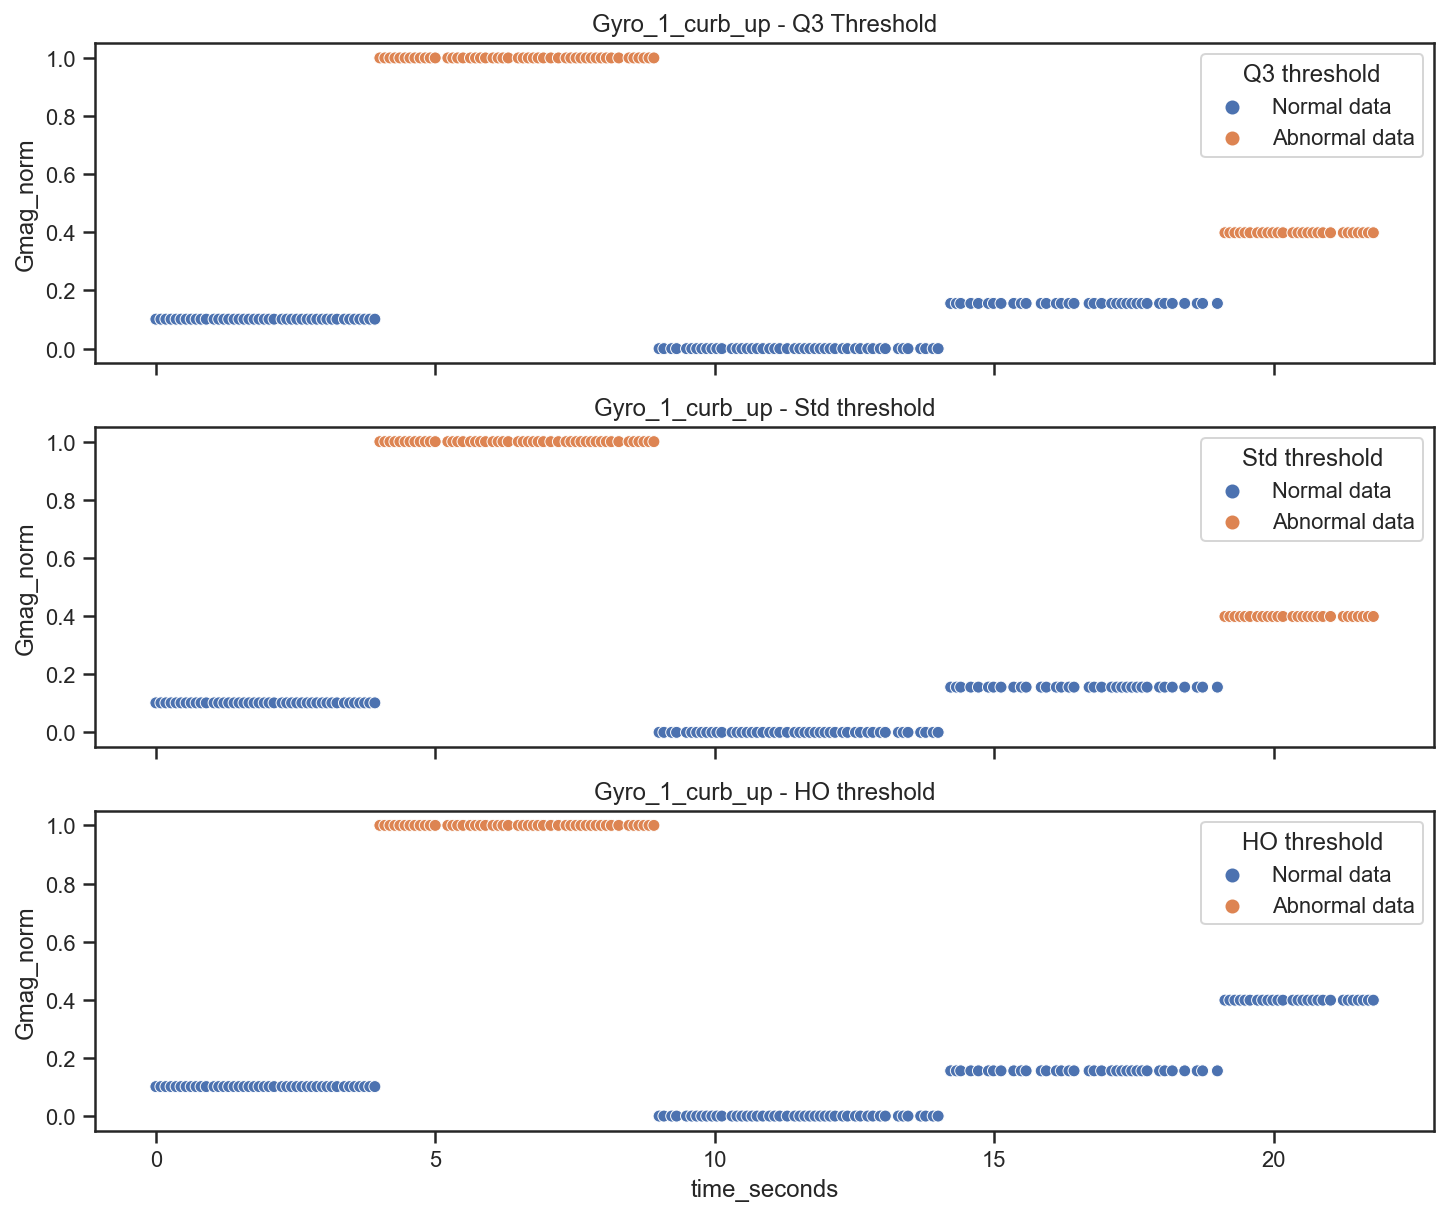

In [135]:
# Visualise the simple classification of normalised fAmag data.


fig, axes = plt.subplots(3,1, figsize=(12,10), sharex=True, sharey=True)

sns.scatterplot(data=Gyro_1_curb_up, ax=axes[0], x = 'time_seconds', y = 'Gmag_norm', hue = 'Q3 threshold').set(title = 'Gyro_1_curb_up - Q3 Threshold')
axes[0].set_xlabel('')

sns.scatterplot(data=Gyro_1_curb_up, ax=axes[1], x = 'time_seconds', y = 'Gmag_norm', hue = 'Std threshold').set(title = 'Gyro_1_curb_up - Std threshold')
axes[1].set_xlabel('')

sns.scatterplot(data=Gyro_1_curb_up, ax=axes[2], x = 'time_seconds', y = 'Gmag_norm', hue = 'HO threshold').set(title = 'Gyro_1_curb_up - HO threshold')

fig.savefig("Gyro_1_curb_up Abnormalities.png")

In [136]:
#calculating length of time of abnormal data
Gyro_1_curb_up_Q3_levels= Gyro_1_curb_up.groupby('Q3 threshold').agg(Duration=('time_seconds_delta',np.sum))

Gyro_1_curb_up_Q3_levels= Gyro_1_curb_up_Q3_levels[Gyro_1_curb_up_Q3_levels.index =="Abnormal data"]

Gyro_1_curb_up_Q3_levels

,Duration
Q3 threshold,
Abnormal data,7.782


In [137]:
#calculating length of time of abnormal data
Gyro_1_curb_up_Std_levels= Gyro_1_curb_up.groupby('Std threshold').agg(Duration=('time_seconds_delta',np.sum))

Gyro_1_curb_up_Std_levels= Gyro_1_curb_up_Std_levels[Gyro_1_curb_up_Std_levels.index =="Abnormal data"]

Gyro_1_curb_up_Std_levels

,Duration
Std threshold,
Abnormal data,7.782


In [138]:
#calculating length of time of abnormal data
Gyro_1_curb_up_HO_levels= Gyro_1_curb_up.groupby('HO threshold').agg(Duration=('time_seconds_delta',np.sum))

Gyro_1_curb_up_HO_levels= Gyro_1_curb_up_HO_levels[Gyro_1_curb_up_HO_levels.index =="Abnormal data"]

Gyro_1_curb_up_HO_levels

,Duration
HO threshold,
Abnormal data,4.992


In [139]:
#Saving the dataframe as png
dfi.export(Gyro_1_curb_up_Q3_levels,"Gyro_1_curb_up_Q3_levels.png")
dfi.export(Gyro_1_curb_up_Std_levels,"Gyro_1_curb_up_Std_levels.png")
dfi.export(Gyro_1_curb_up_HO_levels,"Gyro_1_curb_up_HO_levels.png")


objc[66908]: Class WebSwapCGLLayer is implemented in both /System/Library/Frameworks/WebKit.framework/Versions/A/Frameworks/WebCore.framework/Versions/A/Frameworks/libANGLE-shared.dylib (0x7ffb5ce87ec8) and /Applications/Google Chrome.app/Contents/Frameworks/Google Chrome Framework.framework/Versions/106.0.5249.119/Libraries/libGLESv2.dylib (0x11ec97668). One of the two will be used. Which one is undefined.
[1025/150326.735243:INFO:headless_shell.cc(660)] Written to file /var/folders/5j/_w15pf392csd7_k6_373vp8m0000gn/T/tmpesfcq4tp/temp.png.
objc[66922]: Class WebSwapCGLLayer is implemented in both /System/Library/Frameworks/WebKit.framework/Versions/A/Frameworks/WebCore.framework/Versions/A/Frameworks/libANGLE-shared.dylib (0x7ffb5ce87ec8) and /Applications/Google Chrome.app/Contents/Frameworks/Google Chrome Framework.framework/Versions/106.0.5249.119/Libraries/libGLESv2.dylib (0x10f9b9668). One of the two will be used. Which one is undefined.
[1025/150327.600884:INFO:headless_shell.cc

In [140]:
# Export as new CSV for Step 3
Gyro_1_curb_up.to_csv('Gyro_1_curb_up_normal_vs_abnormal.csv')

## Gyro_2_curb_up Analysis

In [141]:
# Import CSV files
Gyro_2_curb_up = pd.read_csv('Gyro_2_curb_up_31_05_2022_cleaned.csv')

In [142]:
# Check the data
Gyro_2_curb_up.info()
Gyro_2_curb_up.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  177 non-null    int64  
 1   Timestamp   177 non-null    object 
 2   Data        177 non-null    object 
 3   X           177 non-null    float64
 4   Y           177 non-null    float64
 5   Z           177 non-null    float64
dtypes: float64(3), int64(1), object(2)
memory usage: 8.4+ KB


,Unnamed: 0,Timestamp,Data,X,Y,Z
0,0,18:54:03:946,0000227081 [app] INFO: GYRO:,-0.505,0.402,0.167
1,1,18:54:04:082,0000227172 [app] INFO: GYRO:,-0.505,0.402,0.167
2,2,18:54:04:176,0000227307 [app] INFO: GYRO:,-0.505,0.402,0.167
3,3,18:54:04:261,0000227397 [app] INFO: GYRO:,-0.505,0.402,0.167
4,4,18:54:04:357,0000227487 [app] INFO: GYRO:,-0.505,0.402,0.167


In [143]:
# Convert timestamp to datetime
Gyro_2_curb_up['Timestamp'] = pd.to_datetime(Gyro_2_curb_up['Timestamp'], format='%H:%M:%S:%f')


In [144]:
#Check df after datetime conversion
Gyro_2_curb_up.info()
Gyro_2_curb_up.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  177 non-null    int64         
 1   Timestamp   177 non-null    datetime64[ns]
 2   Data        177 non-null    object        
 3   X           177 non-null    float64       
 4   Y           177 non-null    float64       
 5   Z           177 non-null    float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 8.4+ KB


,Unnamed: 0,Timestamp,Data,X,Y,Z
0,0,1900-01-01 18:54:03.946,0000227081 [app] INFO: GYRO:,-0.505,0.402,0.167
1,1,1900-01-01 18:54:04.082,0000227172 [app] INFO: GYRO:,-0.505,0.402,0.167
2,2,1900-01-01 18:54:04.176,0000227307 [app] INFO: GYRO:,-0.505,0.402,0.167
3,3,1900-01-01 18:54:04.261,0000227397 [app] INFO: GYRO:,-0.505,0.402,0.167
4,4,1900-01-01 18:54:04.357,0000227487 [app] INFO: GYRO:,-0.505,0.402,0.167


In [145]:
# Converting timestamps to seconds_Assuming starting from 0 seconds
i = 0
for i in range(Gyro_2_curb_up.shape[0]):
    Gyro_2_curb_up.iloc[i,0] = (Gyro_2_curb_up.iloc[i,1] - Gyro_2_curb_up.iloc[0,1]).total_seconds()


In [146]:
# Formatting the df and checking the head
Gyro_2_curb_up.rename(columns = {'Unnamed: 0':'time_seconds'}, inplace = True)
Gyro_2_curb_up.head()

,time_seconds,Timestamp,Data,X,Y,Z
0,0.000,1900-01-01 18:54:03.946,0000227081 [app] INFO: GYRO:,-0.505,0.402,0.167
1,0.136,1900-01-01 18:54:04.082,0000227172 [app] INFO: GYRO:,-0.505,0.402,0.167
2,0.230,1900-01-01 18:54:04.176,0000227307 [app] INFO: GYRO:,-0.505,0.402,0.167
3,0.315,1900-01-01 18:54:04.261,0000227397 [app] INFO: GYRO:,-0.505,0.402,0.167
4,0.411,1900-01-01 18:54:04.357,0000227487 [app] INFO: GYRO:,-0.505,0.402,0.167


In [147]:
# Adding time delta column - this is the time in seconds between each data row
Gyro_2_curb_up.insert(1,'time_seconds_delta','')

i = 1
for i in range(Gyro_2_curb_up.shape[0]):
    Gyro_2_curb_up.iloc[i,1] = (Gyro_2_curb_up.iloc[i,0] - Gyro_2_curb_up.iloc[i-1,0])
    
Gyro_2_curb_up.iloc[0,1] = 0

In [148]:
# Gmag is equal to (Gx^2+Gy^2+Gz^2)^.5
# Calculating Gmag using gyro data
Gyro_2_curb_up['Gmag'] = (Gyro_2_curb_up['X']**2 + Gyro_2_curb_up['Y']**2 + Gyro_2_curb_up['Z']**2)**0.5

In [149]:
# Check df
Gyro_2_curb_up.info()
Gyro_2_curb_up.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   time_seconds        177 non-null    float64       
 1   time_seconds_delta  177 non-null    object        
 2   Timestamp           177 non-null    datetime64[ns]
 3   Data                177 non-null    object        
 4   X                   177 non-null    float64       
 5   Y                   177 non-null    float64       
 6   Z                   177 non-null    float64       
 7   Gmag                177 non-null    float64       
dtypes: datetime64[ns](1), float64(5), object(2)
memory usage: 11.2+ KB


,time_seconds,time_seconds_delta,Timestamp,Data,X,Y,Z,Gmag
0,0.000,0,1900-01-01 18:54:03.946,0000227081 [app] INFO: GYRO:,-0.505,0.402,0.167,0.666722
1,0.136,0.136,1900-01-01 18:54:04.082,0000227172 [app] INFO: GYRO:,-0.505,0.402,0.167,0.666722
2,0.230,0.094,1900-01-01 18:54:04.176,0000227307 [app] INFO: GYRO:,-0.505,0.402,0.167,0.666722
3,0.315,0.085,1900-01-01 18:54:04.261,0000227397 [app] INFO: GYRO:,-0.505,0.402,0.167,0.666722
4,0.411,0.096,1900-01-01 18:54:04.357,0000227487 [app] INFO: GYRO:,-0.505,0.402,0.167,0.666722


In [150]:
# normalise Gmag
Gyro_2_curb_up['Gmag_norm'] = ((Gyro_2_curb_up['Gmag'] - Gyro_2_curb_up['Gmag'].min())/ 
                                     (Gyro_2_curb_up['Gmag'].max() - Gyro_2_curb_up['Gmag'].min()))

In [151]:

# run thresholds
Gyro_2_curb_up['Std threshold'] = Gyro_2_curb_up['Gmag_norm'].apply(Gmag_std_threshold)
Gyro_2_curb_up['Q3 threshold'] = Gyro_2_curb_up['Gmag_norm'].apply(Gmag_Q3_threshold)
Gyro_2_curb_up['HO threshold'] = Gyro_2_curb_up['Gmag_norm'].apply(Gmag_HO_threshold)

In [152]:
# Check df
Gyro_2_curb_up.info()
Gyro_2_curb_up.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   time_seconds        177 non-null    float64       
 1   time_seconds_delta  177 non-null    object        
 2   Timestamp           177 non-null    datetime64[ns]
 3   Data                177 non-null    object        
 4   X                   177 non-null    float64       
 5   Y                   177 non-null    float64       
 6   Z                   177 non-null    float64       
 7   Gmag                177 non-null    float64       
 8   Gmag_norm           177 non-null    float64       
 9   Std threshold       177 non-null    object        
 10  Q3 threshold        177 non-null    object        
 11  HO threshold        177 non-null    object        
dtypes: datetime64[ns](1), float64(6), object(5)
memory usage: 16.7+ KB


,time_seconds,time_seconds_delta,Timestamp,Data,X,Y,Z,Gmag,Gmag_norm,Std threshold,Q3 threshold,HO threshold
0,0.000,0,1900-01-01 18:54:03.946,0000227081 [app] INFO: GYRO:,-0.505,0.402,0.167,0.666722,0.0,Normal data,Normal data,Normal data
1,0.136,0.136,1900-01-01 18:54:04.082,0000227172 [app] INFO: GYRO:,-0.505,0.402,0.167,0.666722,0.0,Normal data,Normal data,Normal data
2,0.230,0.094,1900-01-01 18:54:04.176,0000227307 [app] INFO: GYRO:,-0.505,0.402,0.167,0.666722,0.0,Normal data,Normal data,Normal data
3,0.315,0.085,1900-01-01 18:54:04.261,0000227397 [app] INFO: GYRO:,-0.505,0.402,0.167,0.666722,0.0,Normal data,Normal data,Normal data
4,0.411,0.096,1900-01-01 18:54:04.357,0000227487 [app] INFO: GYRO:,-0.505,0.402,0.167,0.666722,0.0,Normal data,Normal data,Normal data


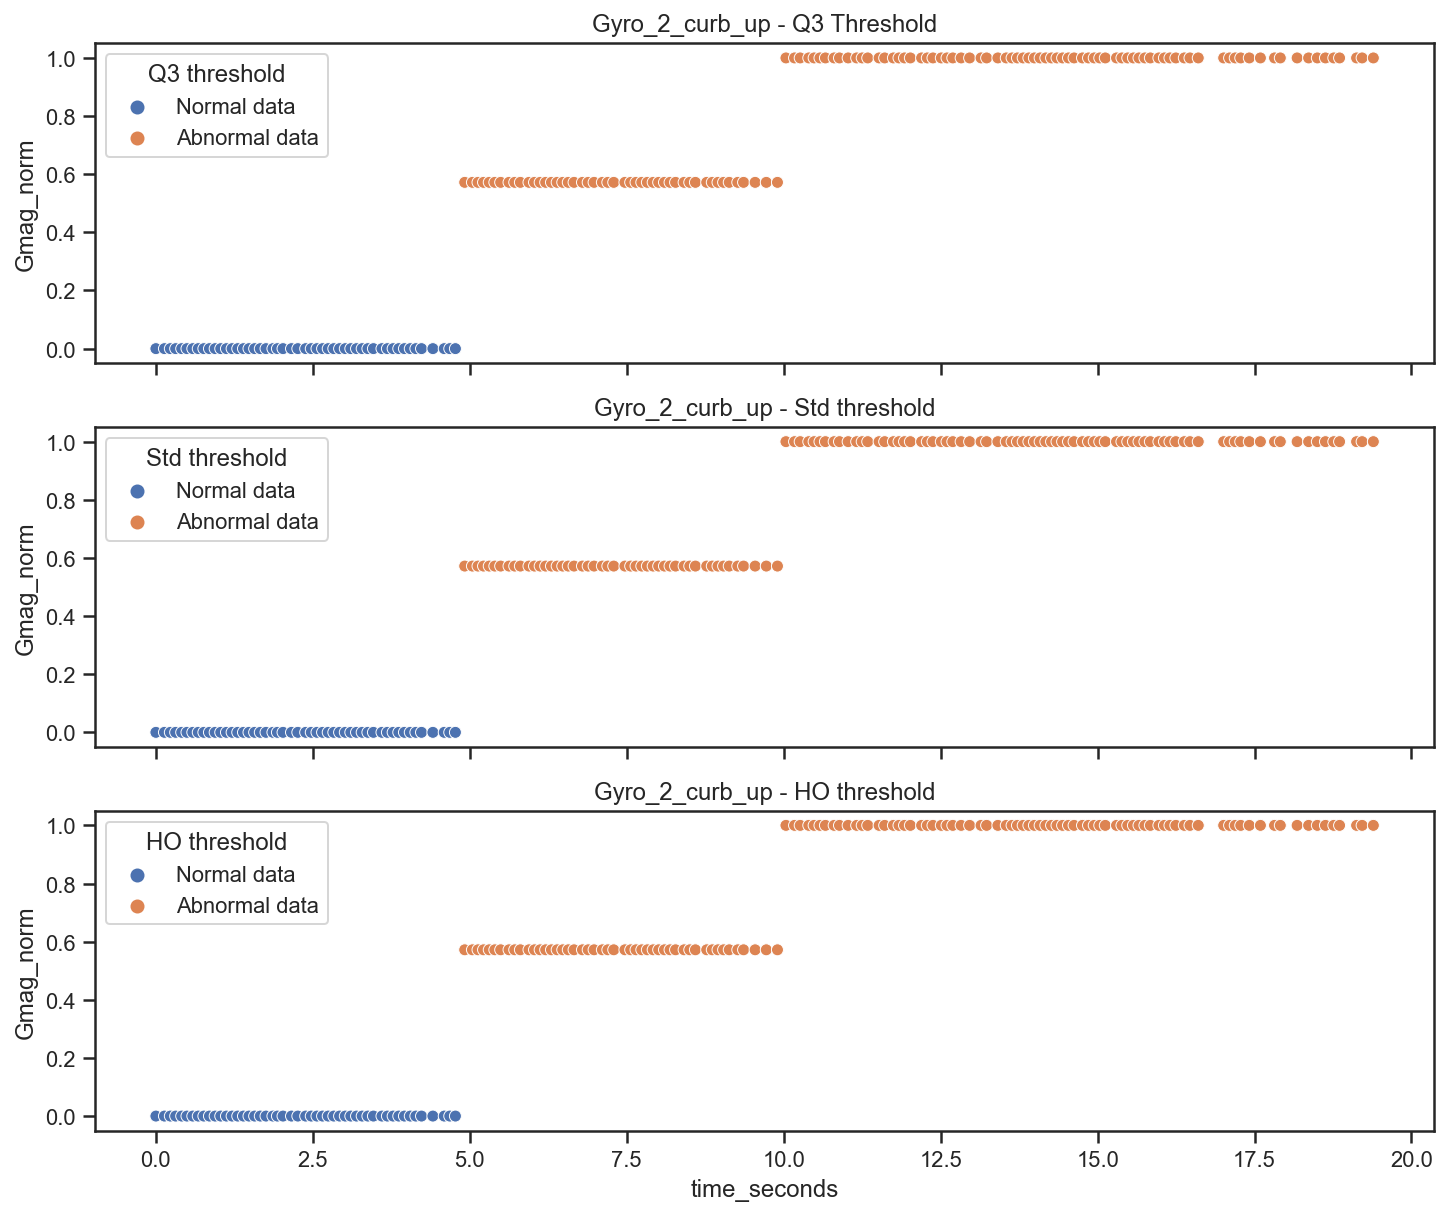

In [153]:
# Visualise the simple classification of normalised fAmag data.


fig, axes = plt.subplots(3,1, figsize=(12,10), sharex=True, sharey=True)

sns.scatterplot(data=Gyro_2_curb_up, ax=axes[0], x = 'time_seconds', y = 'Gmag_norm', hue = 'Q3 threshold').set(title = 'Gyro_2_curb_up - Q3 Threshold')
axes[0].set_xlabel('')

sns.scatterplot(data=Gyro_2_curb_up, ax=axes[1], x = 'time_seconds', y = 'Gmag_norm', hue = 'Std threshold').set(title = 'Gyro_2_curb_up - Std threshold')
axes[1].set_xlabel('')

sns.scatterplot(data=Gyro_2_curb_up, ax=axes[2], x = 'time_seconds', y = 'Gmag_norm', hue = 'HO threshold').set(title = 'Gyro_2_curb_up - HO threshold')

fig.savefig("Gyro_2_curb_up Abnormalities.png")

In [154]:
#calculating length of time of abnormal data
Gyro_2_curb_up_Q3_levels= Gyro_2_curb_up.groupby('Q3 threshold').agg(Duration=('time_seconds_delta',np.sum))

Gyro_2_curb_up_Q3_levels= Gyro_2_curb_up_Q3_levels[Gyro_2_curb_up_Q3_levels.index =="Abnormal data"]

Gyro_2_curb_up_Q3_levels

,Duration
Q3 threshold,
Abnormal data,14.622


In [155]:
#calculating length of time of abnormal data
Gyro_2_curb_up_Std_levels= Gyro_2_curb_up.groupby('Std threshold').agg(Duration=('time_seconds_delta',np.sum))

Gyro_2_curb_up_Std_levels= Gyro_2_curb_up_Std_levels[Gyro_2_curb_up_Std_levels.index =="Abnormal data"]

Gyro_2_curb_up_Std_levels

,Duration
Std threshold,
Abnormal data,14.622


In [156]:
#calculating length of time of abnormal data
Gyro_2_curb_up_HO_levels= Gyro_2_curb_up.groupby('HO threshold').agg(Duration=('time_seconds_delta',np.sum))

Gyro_2_curb_up_HO_levels= Gyro_2_curb_up_HO_levels[Gyro_2_curb_up_HO_levels.index =="Abnormal data"]

Gyro_2_curb_up_HO_levels

,Duration
HO threshold,
Abnormal data,14.622


In [157]:
#Saving the dataframe as png
dfi.export(Gyro_2_curb_up_Q3_levels,"Gyro_2_curb_up_Q3_levels.png")
dfi.export(Gyro_2_curb_up_Std_levels,"Gyro_2_curb_up_Std_levels.png")
dfi.export(Gyro_2_curb_up_HO_levels,"Gyro_2_curb_up_HO_levels.png")


objc[66944]: Class WebSwapCGLLayer is implemented in both /System/Library/Frameworks/WebKit.framework/Versions/A/Frameworks/WebCore.framework/Versions/A/Frameworks/libANGLE-shared.dylib (0x7ffb5ce87ec8) and /Applications/Google Chrome.app/Contents/Frameworks/Google Chrome Framework.framework/Versions/106.0.5249.119/Libraries/libGLESv2.dylib (0x113ad3668). One of the two will be used. Which one is undefined.
[1025/150332.710910:INFO:headless_shell.cc(660)] Written to file /var/folders/5j/_w15pf392csd7_k6_373vp8m0000gn/T/tmp3qd5_ak3/temp.png.
objc[66954]: Class WebSwapCGLLayer is implemented in both /System/Library/Frameworks/WebKit.framework/Versions/A/Frameworks/WebCore.framework/Versions/A/Frameworks/libANGLE-shared.dylib (0x7ffb5ce87ec8) and /Applications/Google Chrome.app/Contents/Frameworks/Google Chrome Framework.framework/Versions/106.0.5249.119/Libraries/libGLESv2.dylib (0x10f697668). One of the two will be used. Which one is undefined.
[1025/150333.812370:INFO:headless_shell.cc

In [158]:
# Export as new CSV for Step 3
Gyro_2_curb_up.to_csv('Gyro_2_curb_up_normal_vs_abnormal.csv')

## Gyro_3_curb_up Analysis

In [159]:
# Import CSV files
Gyro_3_curb_up = pd.read_csv('Gyro_3_curb_up_31_05_2022_cleaned.csv')

In [160]:
# Check the data
Gyro_3_curb_up.info()
Gyro_3_curb_up.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  112 non-null    int64  
 1   Timestamp   112 non-null    object 
 2   Data        112 non-null    object 
 3   X           112 non-null    float64
 4   Y           112 non-null    float64
 5   Z           112 non-null    float64
dtypes: float64(3), int64(1), object(2)
memory usage: 5.4+ KB


,Unnamed: 0,Timestamp,Data,X,Y,Z
0,0,18:54:49:306,0000272396 [app] INFO: GYRO:,-7.311,-2.552,52.319
1,1,18:54:49:395,0000272532 [app] INFO: GYRO:,-7.311,-2.552,52.319
2,2,18:54:49:577,0000272622 [app] INFO: GYRO:,-7.311,-2.552,52.319
3,3,18:54:49:666,0000272802 [app] INFO: GYRO:,-7.311,-2.552,52.319
4,4,18:54:49:803,0000272892 [app] INFO: GYRO:,-7.311,-2.552,52.319


In [161]:
# Convert timestamp to datetime
Gyro_3_curb_up['Timestamp'] = pd.to_datetime(Gyro_3_curb_up['Timestamp'], format='%H:%M:%S:%f')


In [162]:
#Check df after datetime conversion
Gyro_3_curb_up.info()
Gyro_3_curb_up.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  112 non-null    int64         
 1   Timestamp   112 non-null    datetime64[ns]
 2   Data        112 non-null    object        
 3   X           112 non-null    float64       
 4   Y           112 non-null    float64       
 5   Z           112 non-null    float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 5.4+ KB


,Unnamed: 0,Timestamp,Data,X,Y,Z
0,0,1900-01-01 18:54:49.306,0000272396 [app] INFO: GYRO:,-7.311,-2.552,52.319
1,1,1900-01-01 18:54:49.395,0000272532 [app] INFO: GYRO:,-7.311,-2.552,52.319
2,2,1900-01-01 18:54:49.577,0000272622 [app] INFO: GYRO:,-7.311,-2.552,52.319
3,3,1900-01-01 18:54:49.666,0000272802 [app] INFO: GYRO:,-7.311,-2.552,52.319
4,4,1900-01-01 18:54:49.803,0000272892 [app] INFO: GYRO:,-7.311,-2.552,52.319


In [163]:
# Converting timestamps to seconds_Assuming starting from 0 seconds
i = 0
for i in range(Gyro_3_curb_up.shape[0]):
    Gyro_3_curb_up.iloc[i,0] = (Gyro_3_curb_up.iloc[i,1] - Gyro_3_curb_up.iloc[0,1]).total_seconds()


In [164]:
# Formatting the df and checking the head
Gyro_3_curb_up.rename(columns = {'Unnamed: 0':'time_seconds'}, inplace = True)
Gyro_3_curb_up.head()

,time_seconds,Timestamp,Data,X,Y,Z
0,0.000,1900-01-01 18:54:49.306,0000272396 [app] INFO: GYRO:,-7.311,-2.552,52.319
1,0.089,1900-01-01 18:54:49.395,0000272532 [app] INFO: GYRO:,-7.311,-2.552,52.319
2,0.271,1900-01-01 18:54:49.577,0000272622 [app] INFO: GYRO:,-7.311,-2.552,52.319
3,0.360,1900-01-01 18:54:49.666,0000272802 [app] INFO: GYRO:,-7.311,-2.552,52.319
4,0.497,1900-01-01 18:54:49.803,0000272892 [app] INFO: GYRO:,-7.311,-2.552,52.319


In [165]:
# Adding time delta column - this is the time in seconds between each data row
Gyro_3_curb_up.insert(1,'time_seconds_delta','')

i = 1
for i in range(Gyro_3_curb_up.shape[0]):
    Gyro_3_curb_up.iloc[i,1] = (Gyro_3_curb_up.iloc[i,0] - Gyro_3_curb_up.iloc[i-1,0])
    
Gyro_3_curb_up.iloc[0,1] = 0

In [166]:
# Gmag is equal to (Gx^2+Gy^2+Gz^2)^.5
# Calculating Gmag using gyro data
Gyro_3_curb_up['Gmag'] = (Gyro_3_curb_up['X']**2 + Gyro_3_curb_up['Y']**2 + Gyro_3_curb_up['Z']**2)**0.5

In [167]:
# Check df
Gyro_3_curb_up.info()
Gyro_3_curb_up.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   time_seconds        112 non-null    float64       
 1   time_seconds_delta  112 non-null    object        
 2   Timestamp           112 non-null    datetime64[ns]
 3   Data                112 non-null    object        
 4   X                   112 non-null    float64       
 5   Y                   112 non-null    float64       
 6   Z                   112 non-null    float64       
 7   Gmag                112 non-null    float64       
dtypes: datetime64[ns](1), float64(5), object(2)
memory usage: 7.1+ KB


,time_seconds,time_seconds_delta,Timestamp,Data,X,Y,Z,Gmag
0,0.000,0,1900-01-01 18:54:49.306,0000272396 [app] INFO: GYRO:,-7.311,-2.552,52.319,52.888951
1,0.089,0.089,1900-01-01 18:54:49.395,0000272532 [app] INFO: GYRO:,-7.311,-2.552,52.319,52.888951
2,0.271,0.182,1900-01-01 18:54:49.577,0000272622 [app] INFO: GYRO:,-7.311,-2.552,52.319,52.888951
3,0.360,0.089,1900-01-01 18:54:49.666,0000272802 [app] INFO: GYRO:,-7.311,-2.552,52.319,52.888951
4,0.497,0.137,1900-01-01 18:54:49.803,0000272892 [app] INFO: GYRO:,-7.311,-2.552,52.319,52.888951


In [168]:
# normalise Gmag
Gyro_3_curb_up['Gmag_norm'] = ((Gyro_3_curb_up['Gmag'] - Gyro_3_curb_up['Gmag'].min())/ 
                                     (Gyro_3_curb_up['Gmag'].max() - Gyro_3_curb_up['Gmag'].min()))

In [169]:

# run thresholds
Gyro_3_curb_up['Std threshold'] = Gyro_3_curb_up['Gmag_norm'].apply(Gmag_std_threshold)
Gyro_3_curb_up['Q3 threshold'] = Gyro_3_curb_up['Gmag_norm'].apply(Gmag_Q3_threshold)
Gyro_3_curb_up['HO threshold'] = Gyro_3_curb_up['Gmag_norm'].apply(Gmag_HO_threshold)

In [170]:
# Check df
Gyro_3_curb_up.info()
Gyro_3_curb_up.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   time_seconds        112 non-null    float64       
 1   time_seconds_delta  112 non-null    object        
 2   Timestamp           112 non-null    datetime64[ns]
 3   Data                112 non-null    object        
 4   X                   112 non-null    float64       
 5   Y                   112 non-null    float64       
 6   Z                   112 non-null    float64       
 7   Gmag                112 non-null    float64       
 8   Gmag_norm           112 non-null    float64       
 9   Std threshold       112 non-null    object        
 10  Q3 threshold        112 non-null    object        
 11  HO threshold        112 non-null    object        
dtypes: datetime64[ns](1), float64(6), object(5)
memory usage: 10.6+ KB


,time_seconds,time_seconds_delta,Timestamp,Data,X,Y,Z,Gmag,Gmag_norm,Std threshold,Q3 threshold,HO threshold
0,0.000,0,1900-01-01 18:54:49.306,0000272396 [app] INFO: GYRO:,-7.311,-2.552,52.319,52.888951,0.947314,Abnormal data,Abnormal data,Abnormal data
1,0.089,0.089,1900-01-01 18:54:49.395,0000272532 [app] INFO: GYRO:,-7.311,-2.552,52.319,52.888951,0.947314,Abnormal data,Abnormal data,Abnormal data
2,0.271,0.182,1900-01-01 18:54:49.577,0000272622 [app] INFO: GYRO:,-7.311,-2.552,52.319,52.888951,0.947314,Abnormal data,Abnormal data,Abnormal data
3,0.360,0.089,1900-01-01 18:54:49.666,0000272802 [app] INFO: GYRO:,-7.311,-2.552,52.319,52.888951,0.947314,Abnormal data,Abnormal data,Abnormal data
4,0.497,0.137,1900-01-01 18:54:49.803,0000272892 [app] INFO: GYRO:,-7.311,-2.552,52.319,52.888951,0.947314,Abnormal data,Abnormal data,Abnormal data


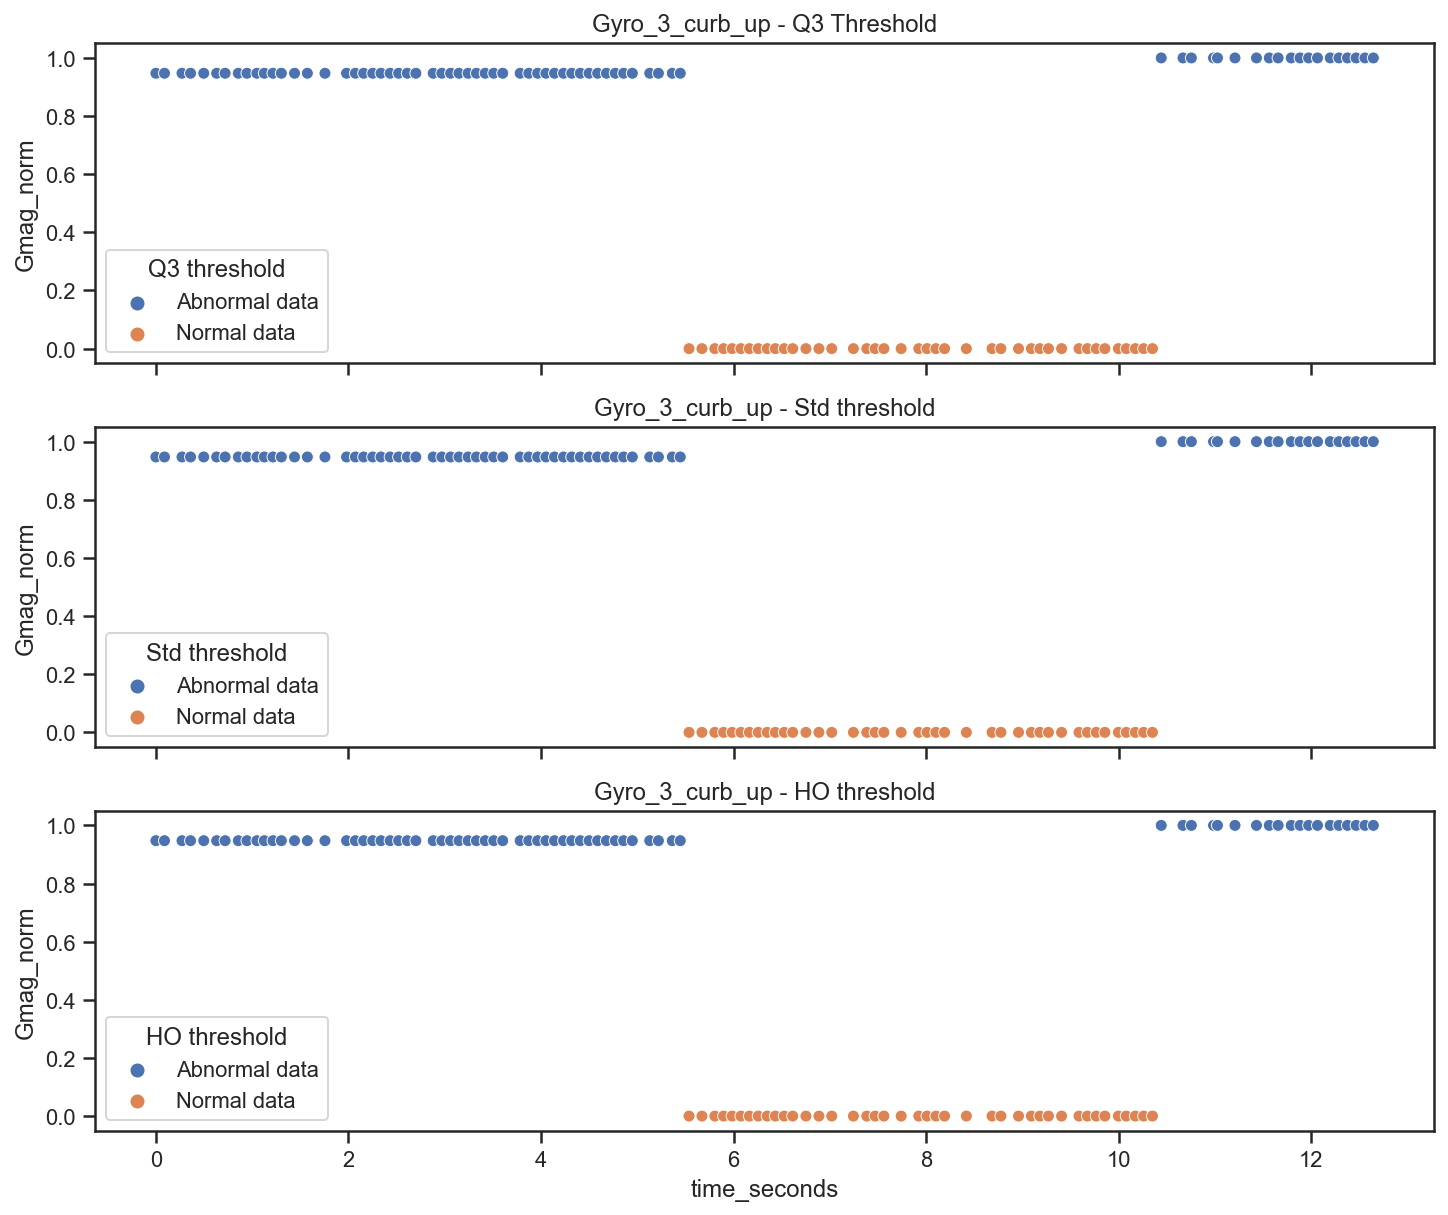

In [171]:
# Visualise the simple classification of normalised fAmag data.


fig, axes = plt.subplots(3,1, figsize=(12,10), sharex=True, sharey=True)

sns.scatterplot(data=Gyro_3_curb_up, ax=axes[0], x = 'time_seconds', y = 'Gmag_norm', hue = 'Q3 threshold').set(title = 'Gyro_3_curb_up - Q3 Threshold')
axes[0].set_xlabel('')

sns.scatterplot(data=Gyro_3_curb_up, ax=axes[1], x = 'time_seconds', y = 'Gmag_norm', hue = 'Std threshold').set(title = 'Gyro_3_curb_up - Std threshold')
axes[1].set_xlabel('')

sns.scatterplot(data=Gyro_3_curb_up, ax=axes[2], x = 'time_seconds', y = 'Gmag_norm', hue = 'HO threshold').set(title = 'Gyro_3_curb_up - HO threshold')

fig.savefig("Gyro_3_curb_up Abnormalities.png")

In [172]:
#calculating length of time of abnormal data
Gyro_3_curb_up_Q3_levels= Gyro_3_curb_up.groupby('Q3 threshold').agg(Duration=('time_seconds_delta',np.sum))

Gyro_3_curb_up_Q3_levels= Gyro_3_curb_up_Q3_levels[Gyro_3_curb_up_Q3_levels.index =="Abnormal data"]

Gyro_3_curb_up_Q3_levels

,Duration
Q3 threshold,
Abnormal data,7.74


In [173]:
#calculating length of time of abnormal data
Gyro_3_curb_up_Std_levels= Gyro_3_curb_up.groupby('Std threshold').agg(Duration=('time_seconds_delta',np.sum))

Gyro_3_curb_up_Std_levels= Gyro_3_curb_up_Std_levels[Gyro_3_curb_up_Std_levels.index =="Abnormal data"]

Gyro_3_curb_up_Std_levels

,Duration
Std threshold,
Abnormal data,7.74


In [174]:
#calculating length of time of abnormal data
Gyro_3_curb_up_HO_levels= Gyro_3_curb_up.groupby('HO threshold').agg(Duration=('time_seconds_delta',np.sum))

Gyro_3_curb_up_HO_levels= Gyro_3_curb_up_HO_levels[Gyro_3_curb_up_HO_levels.index =="Abnormal data"]

Gyro_3_curb_up_HO_levels

,Duration
HO threshold,
Abnormal data,7.74


In [175]:
#Saving the dataframe as png
dfi.export(Gyro_3_curb_up_Q3_levels,"Gyro_3_curb_up_Q3_levels.png")
dfi.export(Gyro_3_curb_up_Std_levels,"Gyro_3_curb_up_Std_levels.png")
dfi.export(Gyro_3_curb_up_HO_levels,"Gyro_3_curb_up_HO_levels.png")


objc[66984]: Class WebSwapCGLLayer is implemented in both /System/Library/Frameworks/WebKit.framework/Versions/A/Frameworks/WebCore.framework/Versions/A/Frameworks/libANGLE-shared.dylib (0x7ffb5ce87ec8) and /Applications/Google Chrome.app/Contents/Frameworks/Google Chrome Framework.framework/Versions/106.0.5249.119/Libraries/libGLESv2.dylib (0x113fda668). One of the two will be used. Which one is undefined.
[1025/150338.560487:INFO:headless_shell.cc(660)] Written to file /var/folders/5j/_w15pf392csd7_k6_373vp8m0000gn/T/tmpyckwmzef/temp.png.
objc[66994]: Class WebSwapCGLLayer is implemented in both /System/Library/Frameworks/WebKit.framework/Versions/A/Frameworks/WebCore.framework/Versions/A/Frameworks/libANGLE-shared.dylib (0x7ffb5ce87ec8) and /Applications/Google Chrome.app/Contents/Frameworks/Google Chrome Framework.framework/Versions/106.0.5249.119/Libraries/libGLESv2.dylib (0x111448668). One of the two will be used. Which one is undefined.
[1025/150339.745197:INFO:headless_shell.cc

In [176]:
# Export as new CSV for Step 3
Gyro_3_curb_up.to_csv('Gyro_3_curb_up_normal_vs_abnormal.csv')